In [2]:
#%% imports
import pickle   
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load AVLTruck db infos

In [3]:
#%% load pickle file "avl_dbinfos.pkl" which is in AVLTruck folder
#load pickle file "avl_dbinfos.pkl" which is in AVLTruck folder
with open('../../data/avltruck/avl_dbinfos_train.pkl', 'rb') as f:
    #store as dataframe
    avl_dbinfos = pickle.load(f)

#dict_keys(['Vehicle_Drivable_Car', 'Human', 'LargeVehicle_Bus', 'Other', 'Vehicle_Ridable_Bicycle', 'Vehicle_Ridable_Motorcycle', 'Dont_Care', 'LargeVehicle_Truck', 'LargeVehicle_TruckCab', 'Trailer', 'Vehicle_Drivable_Van'])
classes = ['Vehicle_Drivable_Car', 'Human', 'LargeVehicle_Bus', 'Other', 
           'Vehicle_Ridable_Bicycle', 'Vehicle_Ridable_Motorcycle', 
           'Dont_Care', 'LargeVehicle_Truck', 'LargeVehicle_TruckCab', 
           'Trailer', 'Vehicle_Drivable_Van']

# create empty dataframe
gt_df = pd.DataFrame()

#loop over all classes and store in dataframe
for i in range(len(classes)):
    gt_df = pd.concat([gt_df, pd.DataFrame(avl_dbinfos[classes[i]])], ignore_index=True)

# Split the 'box3d_lidar' column into separate columns
gt_df[['x', 'y', 'z', 'l', 'w', 'h', 'theta']] = pd.DataFrame(gt_df['box3d_lidar'].tolist())

# Drop the original 'box3d_lidar' column
df = gt_df.drop('box3d_lidar', axis=1)

# rename col name to class
df.rename(columns={'name':'class'}, inplace=True)

# "image_idx" contains 'sequences/CityStreet_dgt_2021-07-08-15-24-00_0_s0/dataset/logical_frame_000020.json', please make a col containing CityStreet_dgt_2021-07-08-15-24-00_0_s0
df['sequence'] = df['image_idx'].str.split('/').str[1]

#rename image_idx to frame_idx
df.rename(columns={'image_idx':'frame_idx'}, inplace=True)

print("Number of instances per class:")
print(df.groupby('class')['num_points_in_gt'].count())

# drop Other and Dont_Care
df = df[df['class'] != 'Other']
df = df[df['class'] != 'Dont_Care']

#merge classes: 
# Vehicle_Drivable_Van, Vehicle_Drivable_Car --> Vehicle
# Vehicle_Ridable_Bicycle, Vehicle_Ridable_Motorcycle --> Bicycle
# LargeVehicle_Truck, LargeVehicle_TruckCab, Trailer --> Truck
# LargeVehicle_Bus, LargeVehicle_Bus_Bendy --> Truck
# Human, PPObject_Stroller --> Pedestrian
df['class'] = df['class'].replace(['Vehicle_Drivable_Van', 'Vehicle_Drivable_Car'], 'Vehicle')
df['class'] = df['class'].replace(['Vehicle_Ridable_Bicycle', 'Vehicle_Ridable_Motorcycle'], 'Bicycle')
df['class'] = df['class'].replace(['LargeVehicle_Truck', 'LargeVehicle_TruckCab', 'Trailer'], 'Truck')
df['class'] = df['class'].replace(['LargeVehicle_Bus', 'LargeVehicle_Bus_Bendy'], 'Truck')
df['class'] = df['class'].replace(['Human', 'PPObject_Stroller'], 'Pedestrian')

print("\nNumber of instances per class after merging:")
print(df.groupby('class')['num_points_in_gt'].count())

df_avltruck = df.copy()

Number of instances per class:
class
Dont_Care                       3687
Human                          56106
LargeVehicle_Bus                6939
LargeVehicle_Truck             38900
LargeVehicle_TruckCab          16800
Other                          15933
Trailer                        25109
Vehicle_Drivable_Car          346293
Vehicle_Drivable_Van           49682
Vehicle_Ridable_Bicycle         8294
Vehicle_Ridable_Motorcycle      6882
Name: num_points_in_gt, dtype: int64

Number of instances per class after merging:
class
Bicycle        15176
Pedestrian     56106
Truck          87748
Vehicle       395975
Name: num_points_in_gt, dtype: int64


### Load AVLRooftop df infos

In [4]:
#%% load pickle file "avl_dbinfos.pkl" which is in AVLRooftop folder
#load pickle file "avl_dbinfos.pkl" which is in AVLRooftop folder
with open('../../data/avlrooftop/avl_dbinfos_train.pkl', 'rb') as f:
    #store as dataframe
    avl_dbinfos = pickle.load(f)

classes = ['Vehicle_Ridable_Bicycle', 'Vehicle_Ridable_Motorcycle', 
             'LargeVehicle_Truck', 'LargeVehicle_TruckCab', 
             'Trailer', 'LargeVehicle_Bus', 'LargeVehicle_Bus_Bendy', 
             'Vehicle_Drivable_Van', 'Vehicle_Drivable_Car', 
             'Human', 
             'PPObject_Stroller']

# create empty dataframe
gt_df = pd.DataFrame()

#loop over all classes and store in dataframe
for i in range(len(classes)):
    gt_df = pd.concat([gt_df, pd.DataFrame(avl_dbinfos[classes[i]])], ignore_index=True)

# Split the 'box3d_lidar' column into separate columns
gt_df[['x', 'y', 'z', 'l', 'w', 'h', 'theta']] = pd.DataFrame(gt_df['box3d_lidar'].tolist())

# Drop the original 'box3d_lidar' column
df = gt_df.drop('box3d_lidar', axis=1)

# rename col name to class
df.rename(columns={'name':'class'}, inplace=True)

# "image_idx" contains 'sequences/CityStreet_dgt_2021-07-08-15-24-00_0_s0/dataset/logical_frame_000020.json', please make a col containing CityStreet_dgt_2021-07-08-15-24-00_0_s0
df['sequence'] = df['image_idx'].str.split('/').str[1]

#rename image_idx to frame_idx
df.rename(columns={'image_idx':'frame_idx'}, inplace=True)

print("Number of instances per class:")
print(df.groupby('class')['num_points_in_gt'].count())

#merge classes: 
# Vehicle_Drivable_Van, Vehicle_Drivable_Car --> Vehicle
# Vehicle_Ridable_Bicycle, Vehicle_Ridable_Motorcycle --> Bicycle
# LargeVehicle_Truck, LargeVehicle_TruckCab, Trailer --> Truck
# LargeVehicle_Bus, LargeVehicle_Bus_Bendy --> Truck
# Human, PPObject_Stroller --> Pedestrian
df['class'] = df['class'].replace(['Vehicle_Drivable_Van', 'Vehicle_Drivable_Car'], 'Vehicle')
df['class'] = df['class'].replace(['Vehicle_Ridable_Bicycle', 'Vehicle_Ridable_Motorcycle'], 'Bicycle')
df['class'] = df['class'].replace(['LargeVehicle_Truck', 'LargeVehicle_TruckCab', 'Trailer'], 'Truck')
df['class'] = df['class'].replace(['LargeVehicle_Bus', 'LargeVehicle_Bus_Bendy'], 'Truck')
df['class'] = df['class'].replace(['Human', 'PPObject_Stroller'], 'Pedestrian')

print("\nNumber of instances per class after merging:")
print(df.groupby('class')['num_points_in_gt'].count())

df_avlrooftop = df.copy()


Number of instances per class:
class
Human                          3499
LargeVehicle_Bus                856
LargeVehicle_Bus_Bendy           82
LargeVehicle_Truck             7841
LargeVehicle_TruckCab          3796
PPObject_Stroller                73
Trailer                        6232
Vehicle_Drivable_Car          66519
Vehicle_Drivable_Van           6629
Vehicle_Ridable_Bicycle        1526
Vehicle_Ridable_Motorcycle      266
Name: num_points_in_gt, dtype: int64

Number of instances per class after merging:
class
Bicycle        1792
Pedestrian     3572
Truck         18807
Vehicle       73148
Name: num_points_in_gt, dtype: int64


### Load ZOD db infos

In [5]:
#%% load pickle file "zod_dbinfos.pkl" which is in zod folder

with open('../../data/zod/zod_dbinfos_train_full.pkl', 'rb') as f:
    #store as dataframe
    zod_dbinfos = pickle.load(f)

classes =  ["Vehicle_Car", "Vehicle_Van", "Vehicle_Truck", "Vehicle_Trailer", 
            "Vehicle_Bus", "Vehicle_HeavyEquip", "Vehicle_TramTrain",
            "VulnerableVehicle_Bicycle", "VulnerableVehicle_Motorcycle",
            "Pedestrian"]

# create empty dataframe
gt_df = pd.DataFrame()

#loop over all classes and store in dataframe
for i in range(len(classes)):
    gt_df = pd.concat([gt_df, pd.DataFrame(zod_dbinfos[classes[i]])], ignore_index=True)

# Split the 'box3d_lidar' column into separate columns
gt_df[['x', 'y', 'z', 'l', 'w', 'h', 'theta']] = pd.DataFrame(gt_df['box3d_lidar'].tolist())

# Drop the original 'box3d_lidar' column
df = gt_df.drop('box3d_lidar', axis=1)

# split "path" by "/", take the last element, split by "_", take the first element
df['frame_idx'] = df['path'].str.split('/').str[-1].str.split('_').str[0]


# rename col name to class
df.rename(columns={'name':'class'}, inplace=True)

print("Number of instances per class:")
print(df.groupby('class')['num_points_in_gt'].count())

#merge classes: 
# Vehicle_Car, Vehicle_Van to Vehicle
df.loc[df['class'] == 'Vehicle_Car', 'class'] = 'Vehicle'
df.loc[df['class'] == 'Vehicle_Van', 'class'] = 'Vehicle'

# Vehicle_Truck, Vehicle_Trailer, Vehicle_Bus, Vehicle_HeavyEquip, Vehicle_TramTrain to Truck
df.loc[df['class'] == 'Vehicle_Truck', 'class'] = 'Truck'
df.loc[df['class'] == 'Vehicle_Trailer', 'class'] = 'Truck'
df.loc[df['class'] == 'Vehicle_Bus', 'class'] = 'Truck'
df.loc[df['class'] == 'Vehicle_HeavyEquip', 'class'] = 'Truck'
df.loc[df['class'] == 'Vehicle_TramTrain', 'class'] = 'Truck'

# VulnerableVehicle_Bicycle, VulnerableVehicle_Motorcycle to Bicycle
df.loc[df['class'] == 'VulnerableVehicle_Bicycle', 'class'] = 'Bicycle'
df.loc[df['class'] == 'VulnerableVehicle_Motorcycle', 'class'] = 'Bicycle'

print("\nNumber of instances per class after merge:")
print(df.groupby('class')['num_points_in_gt'].count())

df_zod = df.copy()

Number of instances per class:
class
Pedestrian                      227273
Vehicle_Bus                      18716
Vehicle_Car                     848521
Vehicle_HeavyEquip                2416
Vehicle_Trailer                   3677
Vehicle_TramTrain                10398
Vehicle_Truck                    50730
Vehicle_Van                      87161
VulnerableVehicle_Bicycle        33591
VulnerableVehicle_Motorcycle      9926
Name: num_points_in_gt, dtype: int64

Number of instances per class after merge:
class
Bicycle        43517
Pedestrian    227273
Truck          85937
Vehicle       935682
Name: num_points_in_gt, dtype: int64


In [6]:
#combine datasets
dataset_names = ['AVLTruck', 'AVLRooftop', 'ZOD']
colors = ["g", "r", "b"]

n = min(len(df_avltruck), len(df_avlrooftop), len(df_zod))
print(n)
datasets = [df_avltruck.sample(n=n, random_state=1), 
            df_avlrooftop.sample(n=n, random_state=1), 
            df_zod.sample(n=n, random_state=1)]


#merge datasets with additional dataset column
for i, dataset in enumerate(datasets):
    dataset["dataset"] = dataset_names[i]

df = pd.concat(datasets, ignore_index=True)

97319


### Analyze box positions in terms of point_per_box

/tmp/ipykernel_457641/3843190659.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_fov["distance"] = np.sqrt(dataset_fov["x"]**2 + dataset_fov["y"]**2)


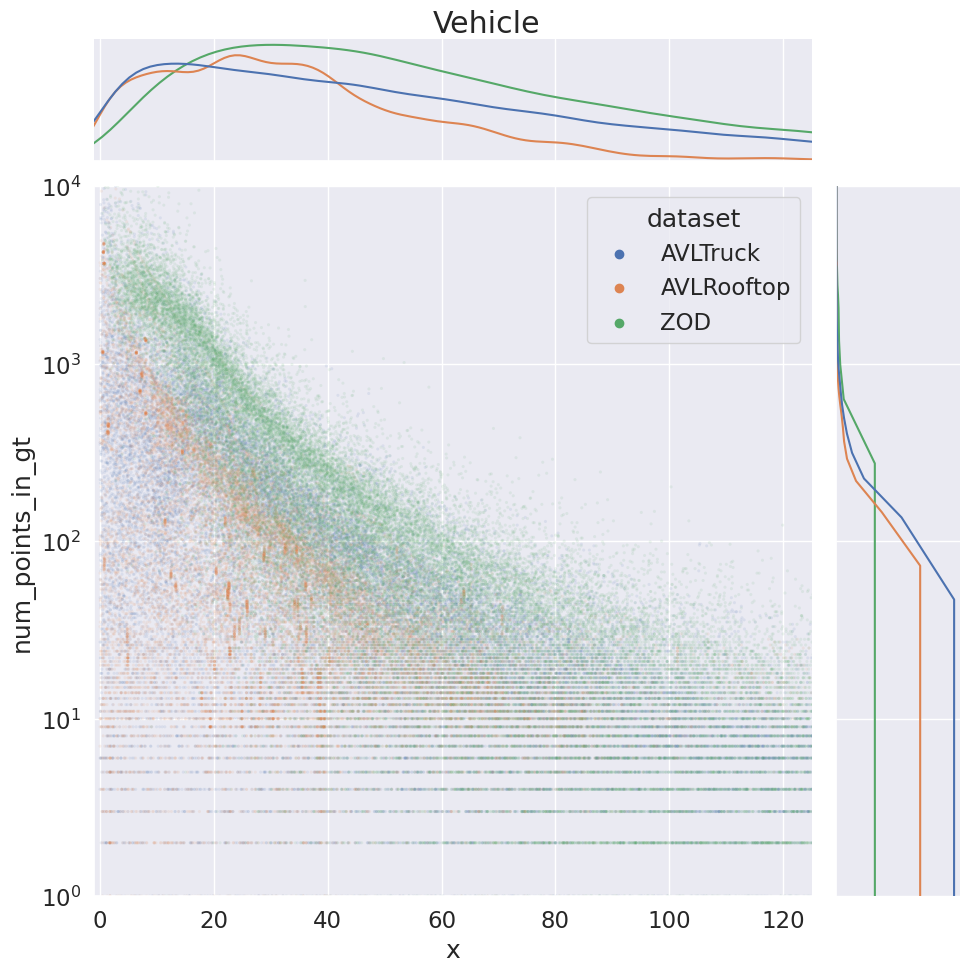

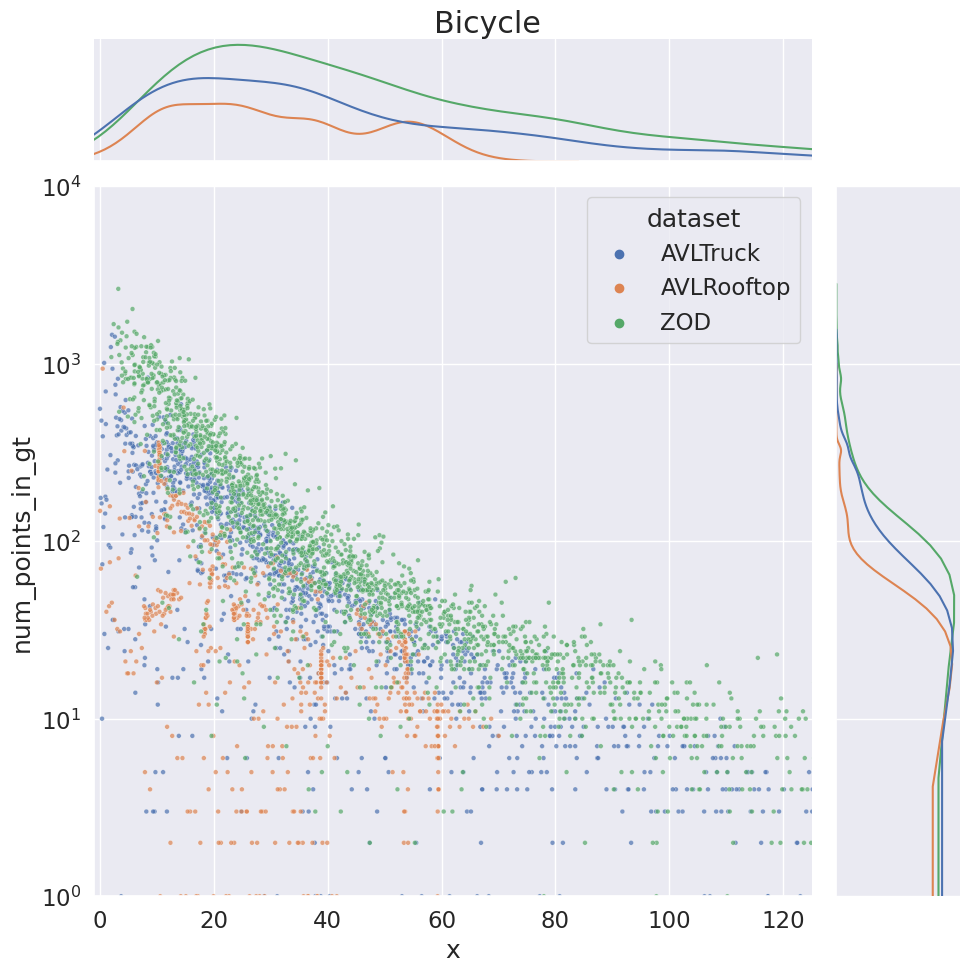

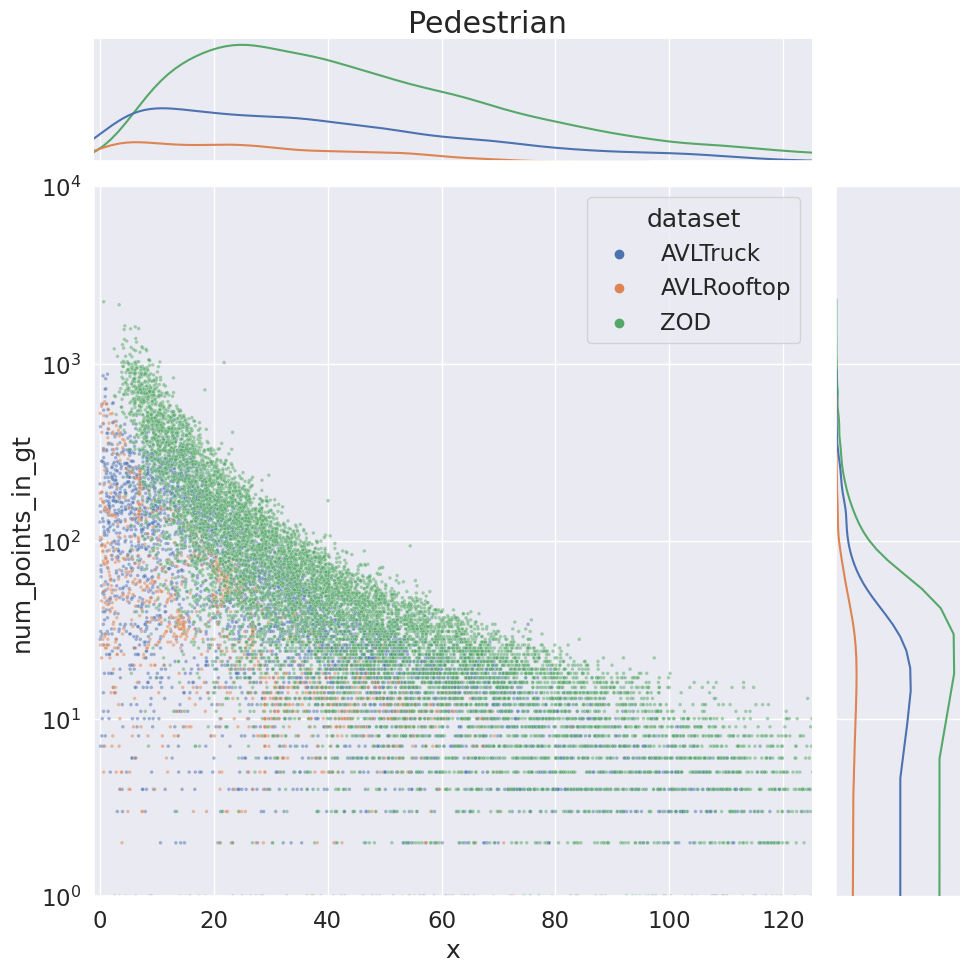

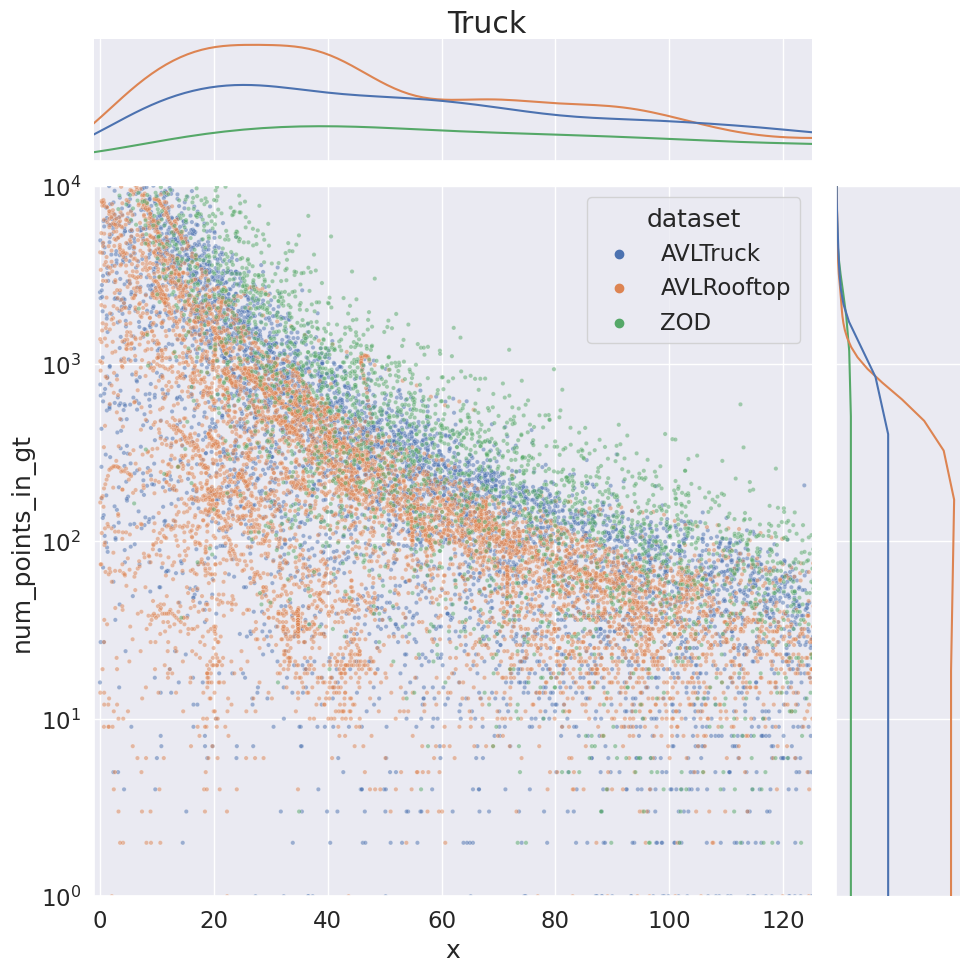

In [15]:
#preprocessing

#filter for boxes that are in 120° fov of sensor
angle = np.arctan2(df["y"], df["x"])
fov_mask = ((np.abs(angle) < 120/2) & (df["x"] > 0))
dataset_fov = df[fov_mask]
dataset_fov["distance"] = np.sqrt(dataset_fov["x"]**2 + dataset_fov["y"]**2)
#filter bboxes with 0 points
dataset_fov = dataset_fov[dataset_fov["num_points_in_gt"] > 0]


classes = ['Vehicle', 'Bicycle', 'Pedestrian', 'Truck']
dataset_colors = sns.color_palette('husl', n_colors=len(datasets))
s = [5, 12, 7, 10]
alpha = [0.1, 0.7, 0.5, 0.5]
for class_nr, class_name in enumerate(classes):

    #filter for vehicle class
    dataset_fov_plot = dataset_fov[dataset_fov["class"] == class_name]
    p = sns.jointplot(data=dataset_fov_plot, x='x', y='num_points_in_gt', hue="dataset", alpha=alpha[class_nr], s=s[class_nr], height=10, marginal_kws=dict(fill=False))
    p.fig.suptitle(class_name)
    p.fig.subplots_adjust(top=0.95) # Reduce plot to make room 
    ax = p.ax_joint

    ax.set_yscale('log')
    ax.set_ylim(1, 10000)
    ax.set_xlim(-1, 125)
    p.ax_marg_y.set_yscale('log')


### Analyze gt box sizes datasetwise

###############dataset AVLTruck ###############
Median value for {'l', 'w', 'h', 'theta'} and all the classes:
                   l         w         h     theta
class                                             
Bicycle     1.942082  0.755111  1.599506 -0.138832
Pedestrian  0.756963  0.714888  1.648238  0.030460
Truck       8.590661  2.838536  3.458272 -0.148303
Vehicle     4.188139  1.896810  1.619638 -0.108879


/tmp/ipykernel_457641/2869169763.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby('class')['l', 'w', 'h', 'theta'].mean())


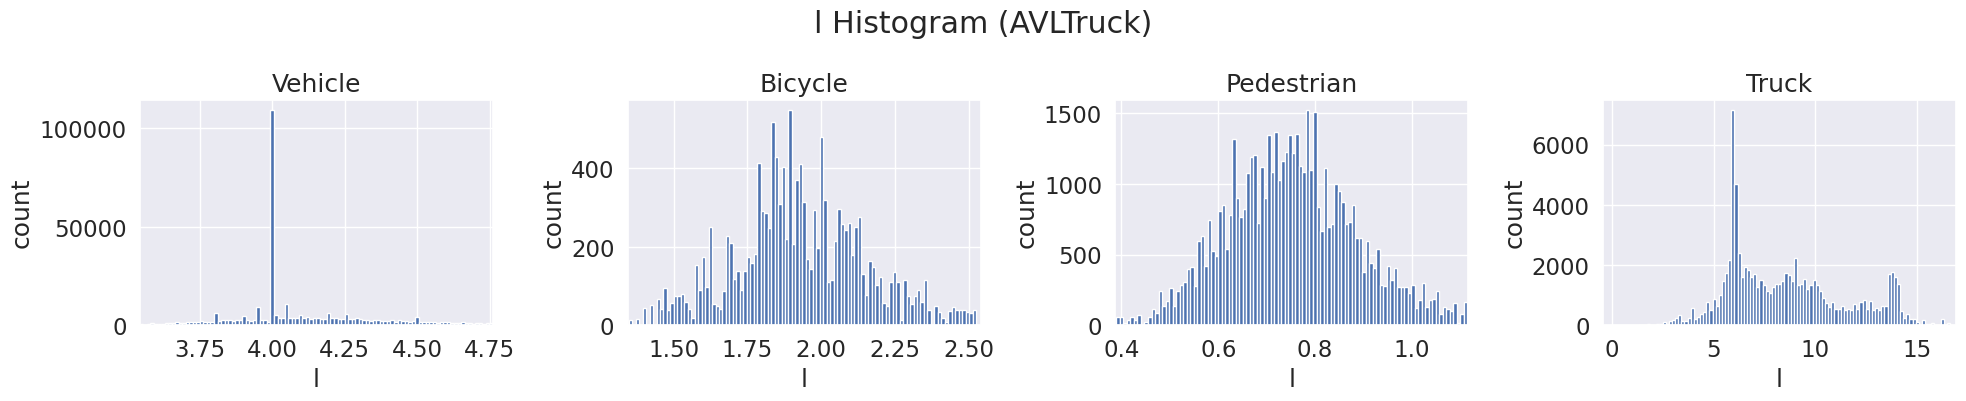

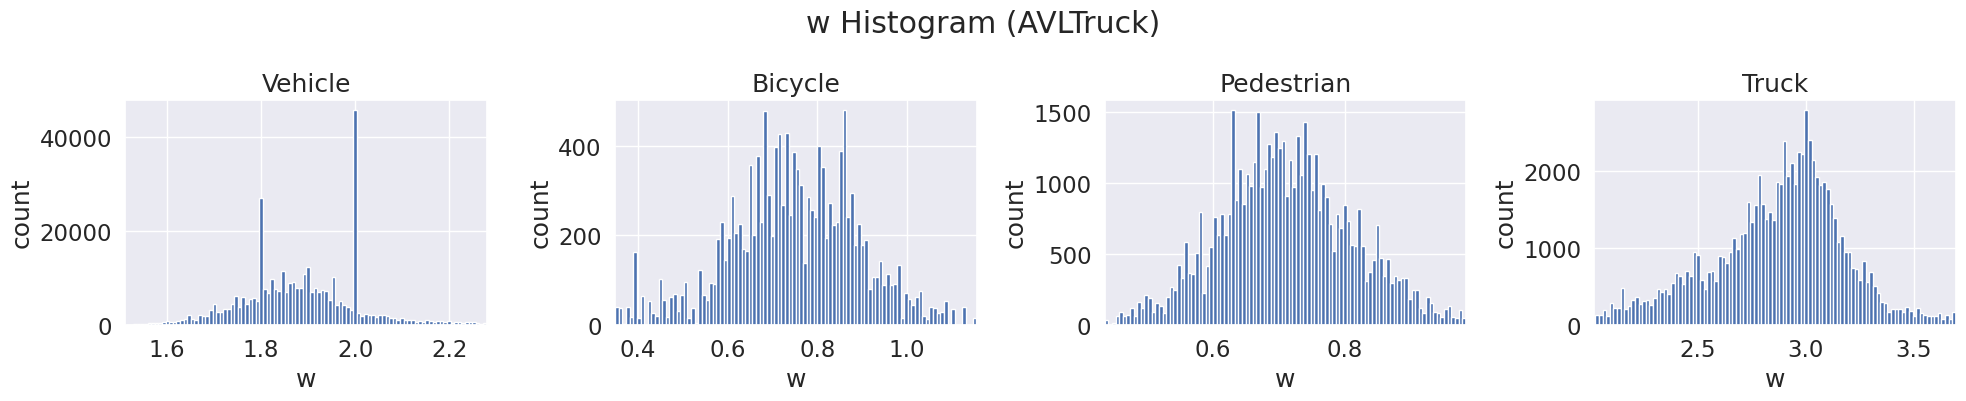

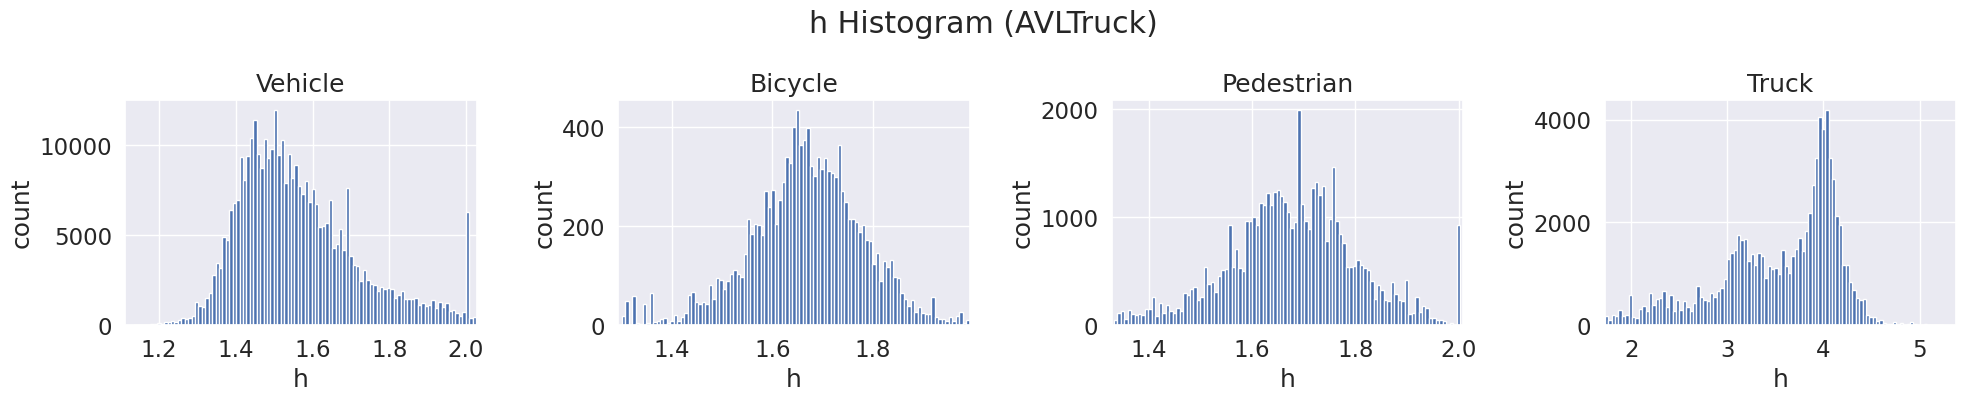

###############dataset AVLRooftop ###############
Median value for {'l', 'w', 'h', 'theta'} and all the classes:
                   l         w         h     theta
class                                             
Bicycle     2.187255  0.808831  1.755270 -1.071646
Pedestrian  0.850968  0.819270  1.722440 -0.204630
Truck       9.165524  3.314212  3.683593  0.254731
Vehicle     4.425499  2.082867  1.677022  0.097166


/tmp/ipykernel_457641/2869169763.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby('class')['l', 'w', 'h', 'theta'].mean())


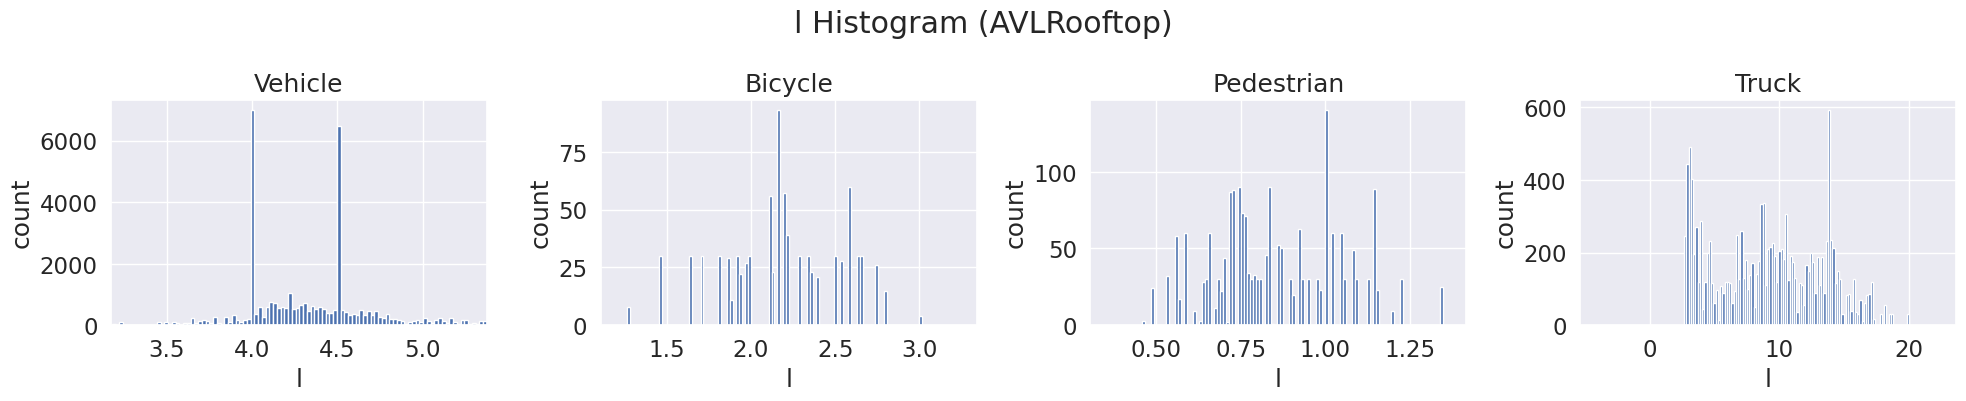

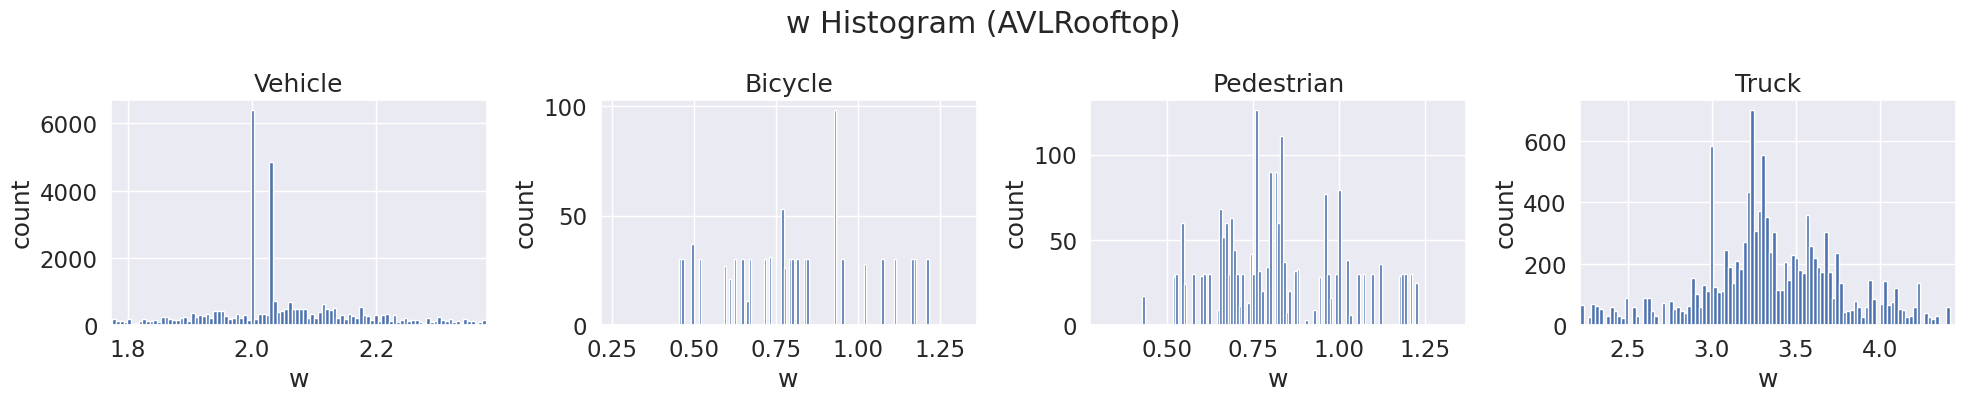

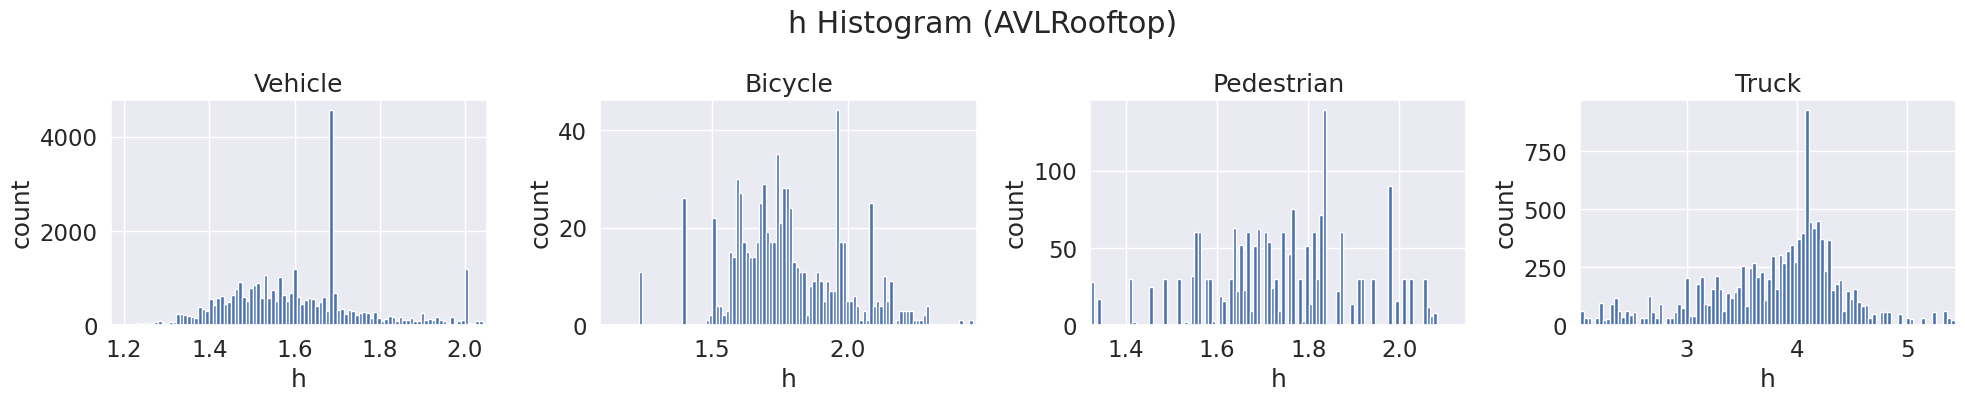

###############dataset ZOD ###############
Median value for {'l', 'w', 'h', 'theta'} and all the classes:
                    l         w         h     theta
class                                              
Bicycle      1.795113  0.713845  1.712576  1.801666
Pedestrian   0.615163  0.642990  1.678933  1.650806
Truck       10.625409  2.734351  3.323775  1.548732
Vehicle      4.155218  1.890465  1.599748  1.690267


/tmp/ipykernel_457641/2869169763.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby('class')['l', 'w', 'h', 'theta'].mean())


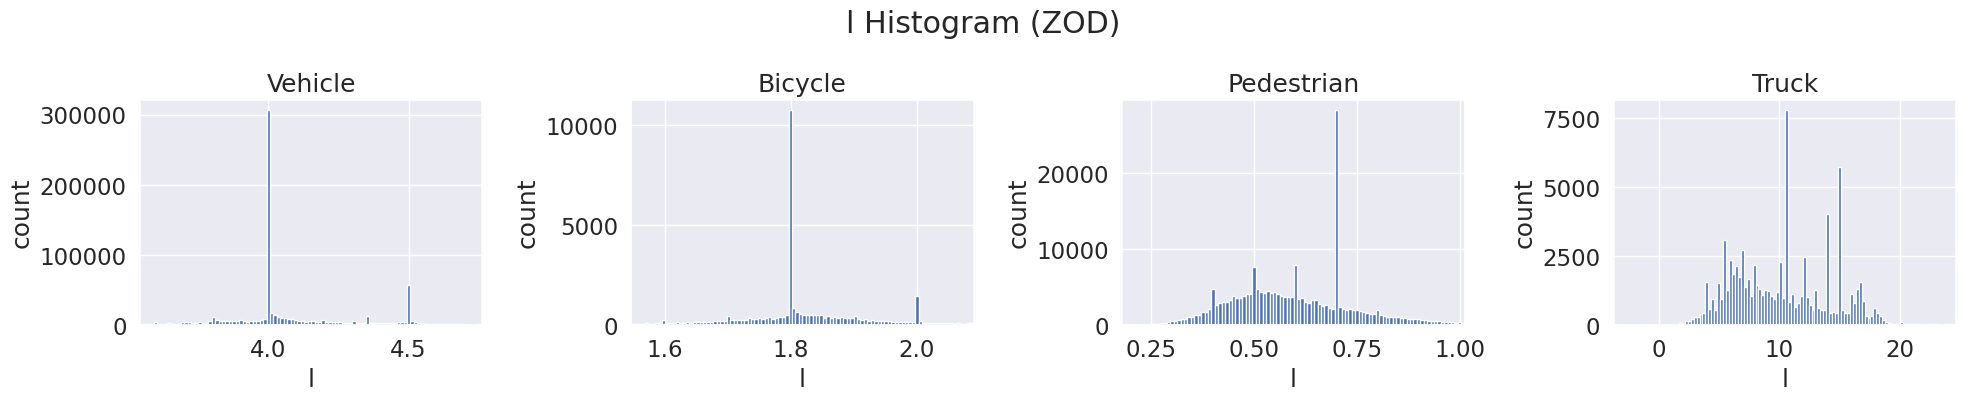

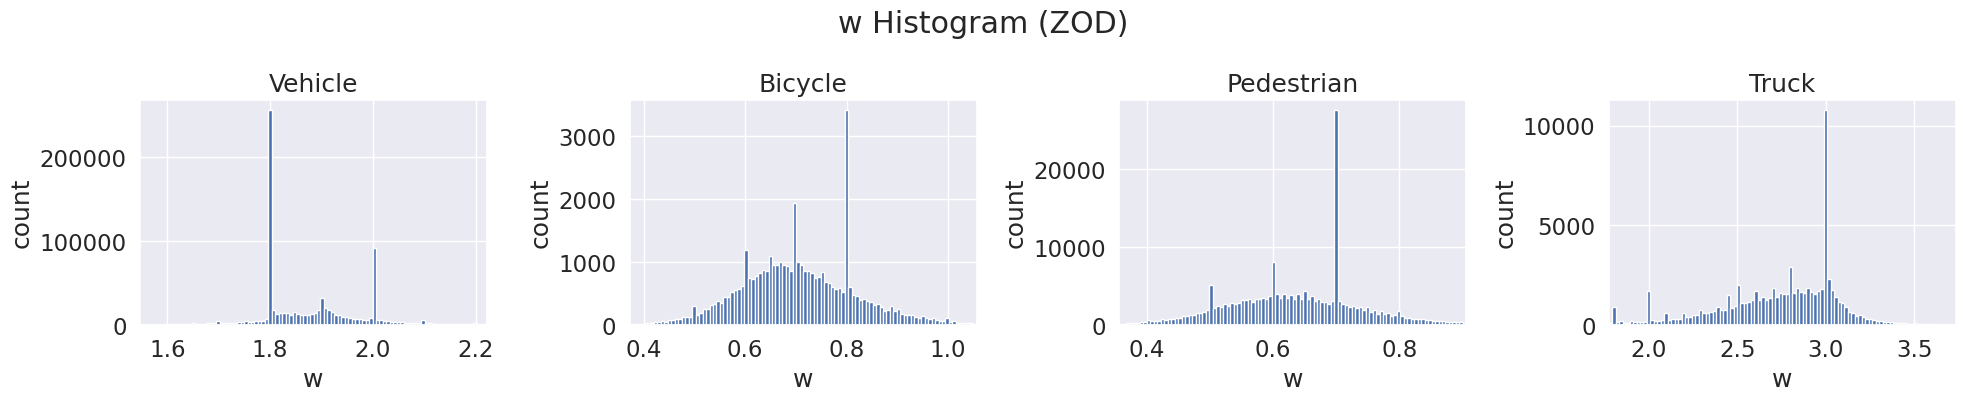

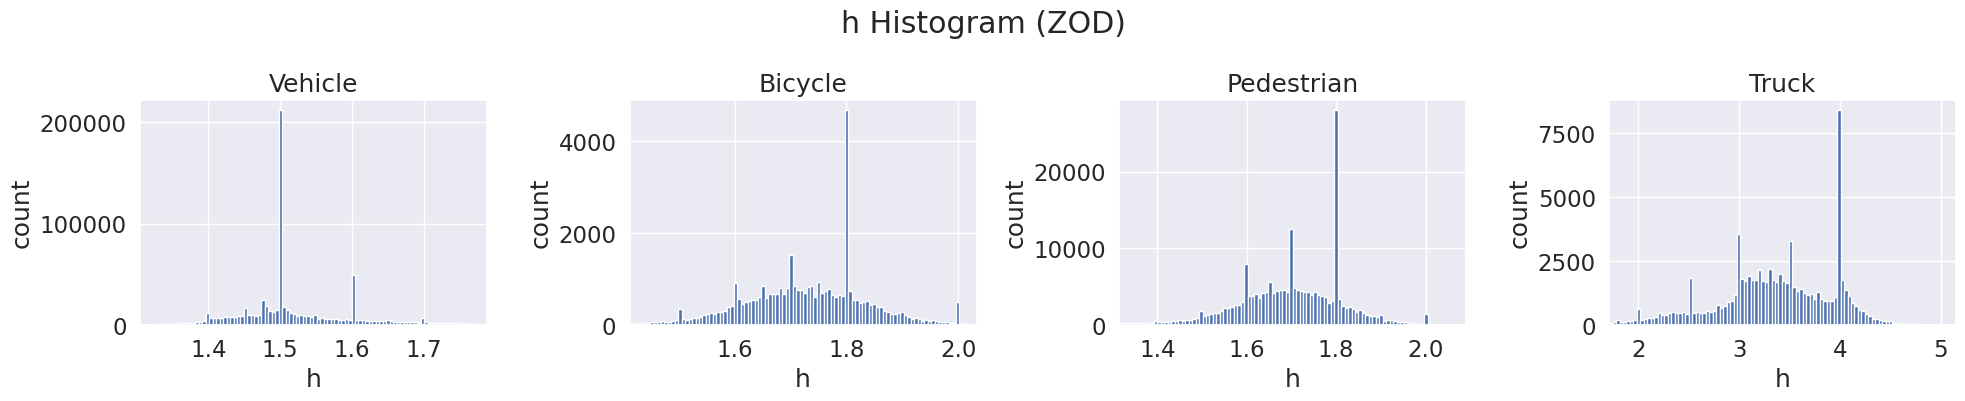

In [12]:
datasets = [df_avltruck, df_avlrooftop, df_zod]
dataset_names = ['AVLTruck', 'AVLRooftop', 'ZOD']
class_names = ['Vehicle', 'Bicycle', 'Pedestrian', 'Truck']

metrics = ['l', 'w', 'h']
for dataset_idx, df in enumerate(datasets):
    print("###############dataset", dataset_names[dataset_idx], "###############")
    #%% print median value for {'l', 'w', 'h', 'theta'} and all the classes
    print("Median value for {'l', 'w', 'h', 'theta'} and all the classes:")
    print(df.groupby('class')['l', 'w', 'h', 'theta'].mean())

    # print median value for {'x', 'y', 'z',} and all the classes
    #print("Median value for {'x', 'y', 'z',} and all the classes:")
    #print(df.groupby('class')['x', 'y', 'z'].mean())

    # %%print distr

    for metric in metrics:
        sns.set_style("darkgrid")
        sns.set_context("paper")
        sns.set(font_scale=1.5)
        plt.figure(figsize=(20, 10))
        for class_idx in range(len(class_names)):
            plt.subplot(3,4,class_idx+1)
            #ignore outliers for scaling
            #calc liimits
            q1 = df[df['class'] == class_names[class_idx]][metric].quantile(0.25)
            q3 = df[df['class'] == class_names[class_idx]][metric].quantile(0.75)
            iqr = q3 - q1
            upper_limit = q3 + 1.5 * iqr
            lower_limit = q1 - 1.5 * iqr
            #redice data to limits
            df_filtered = df[(df[metric] < upper_limit) & (df[metric] > lower_limit)]

            plt.hist(df_filtered[df_filtered['class'] == class_names[class_idx]][metric], bins=100)
            plt.title(class_names[class_idx])
            plt.xlabel(metric)
            plt.ylabel('count')        


            #set limits
            plt.xlim(lower_limit, upper_limit)

        plt.suptitle(metric + ' Histogram ('+ dataset_names[dataset_idx]+')')
        plt.tight_layout()
        plt.show()    


### Analyze gt box sizes metricwise

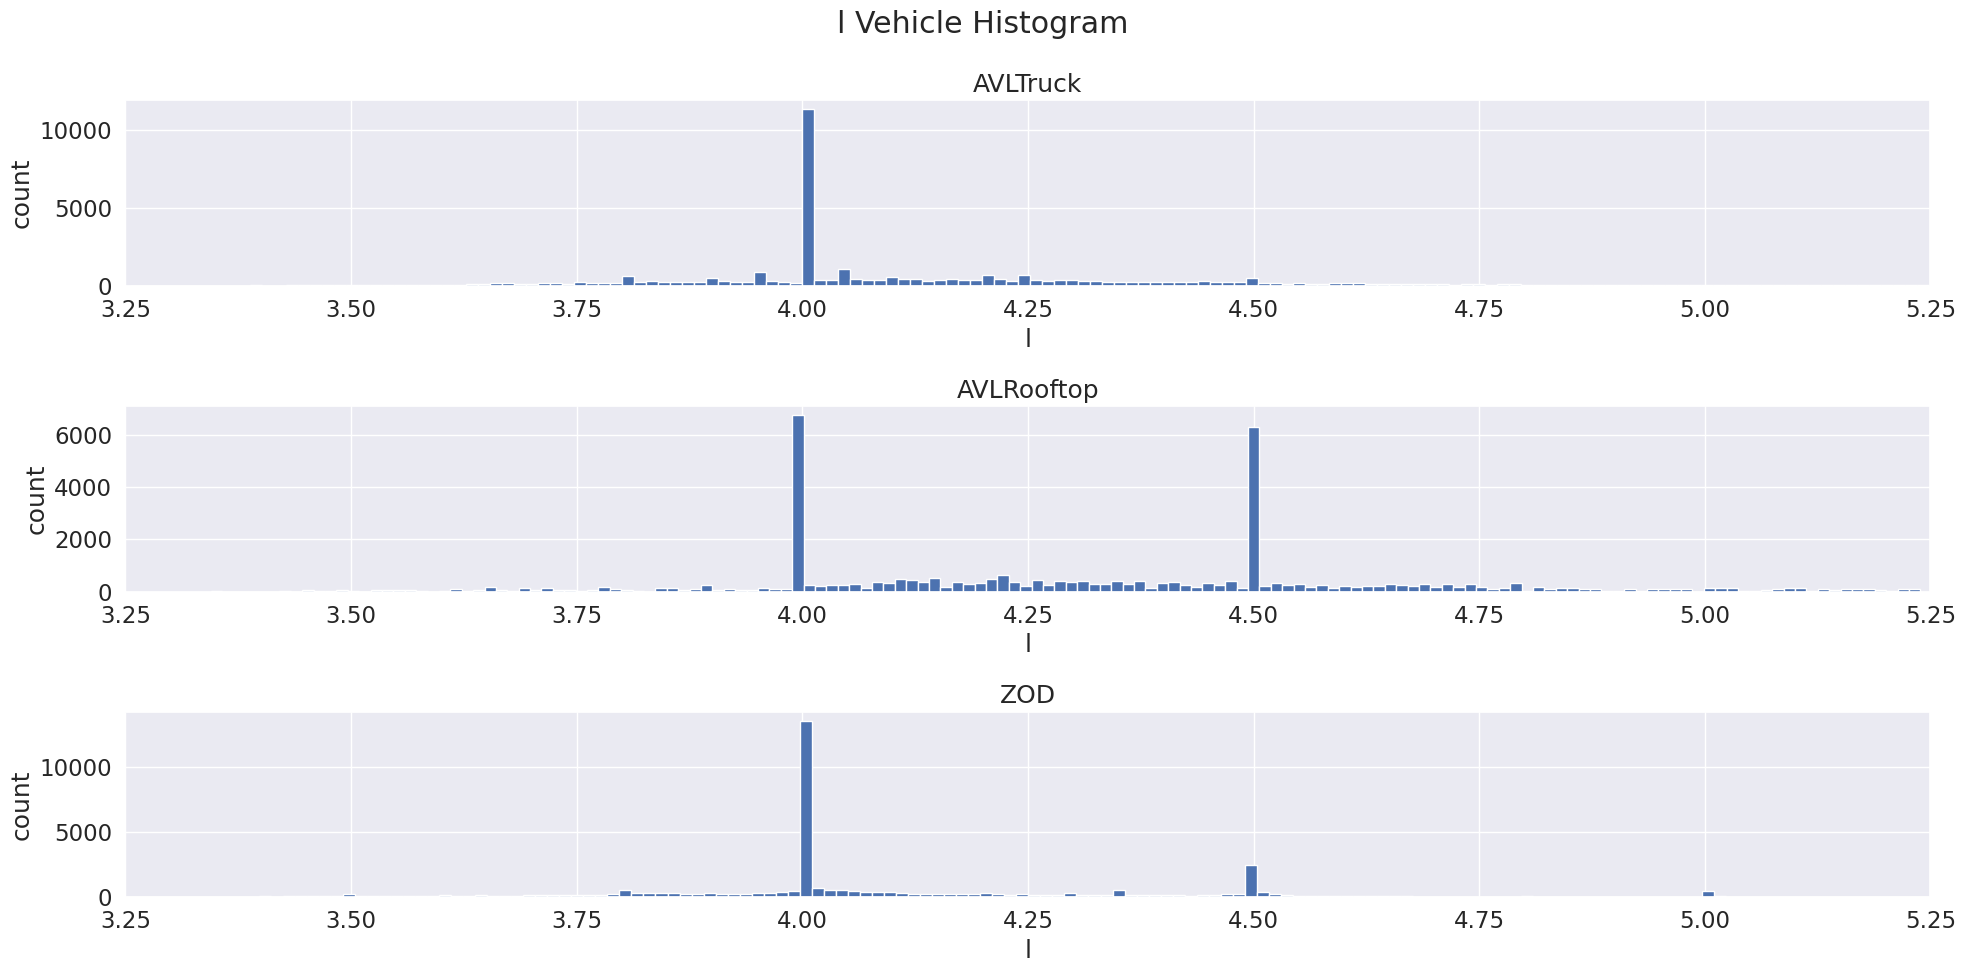

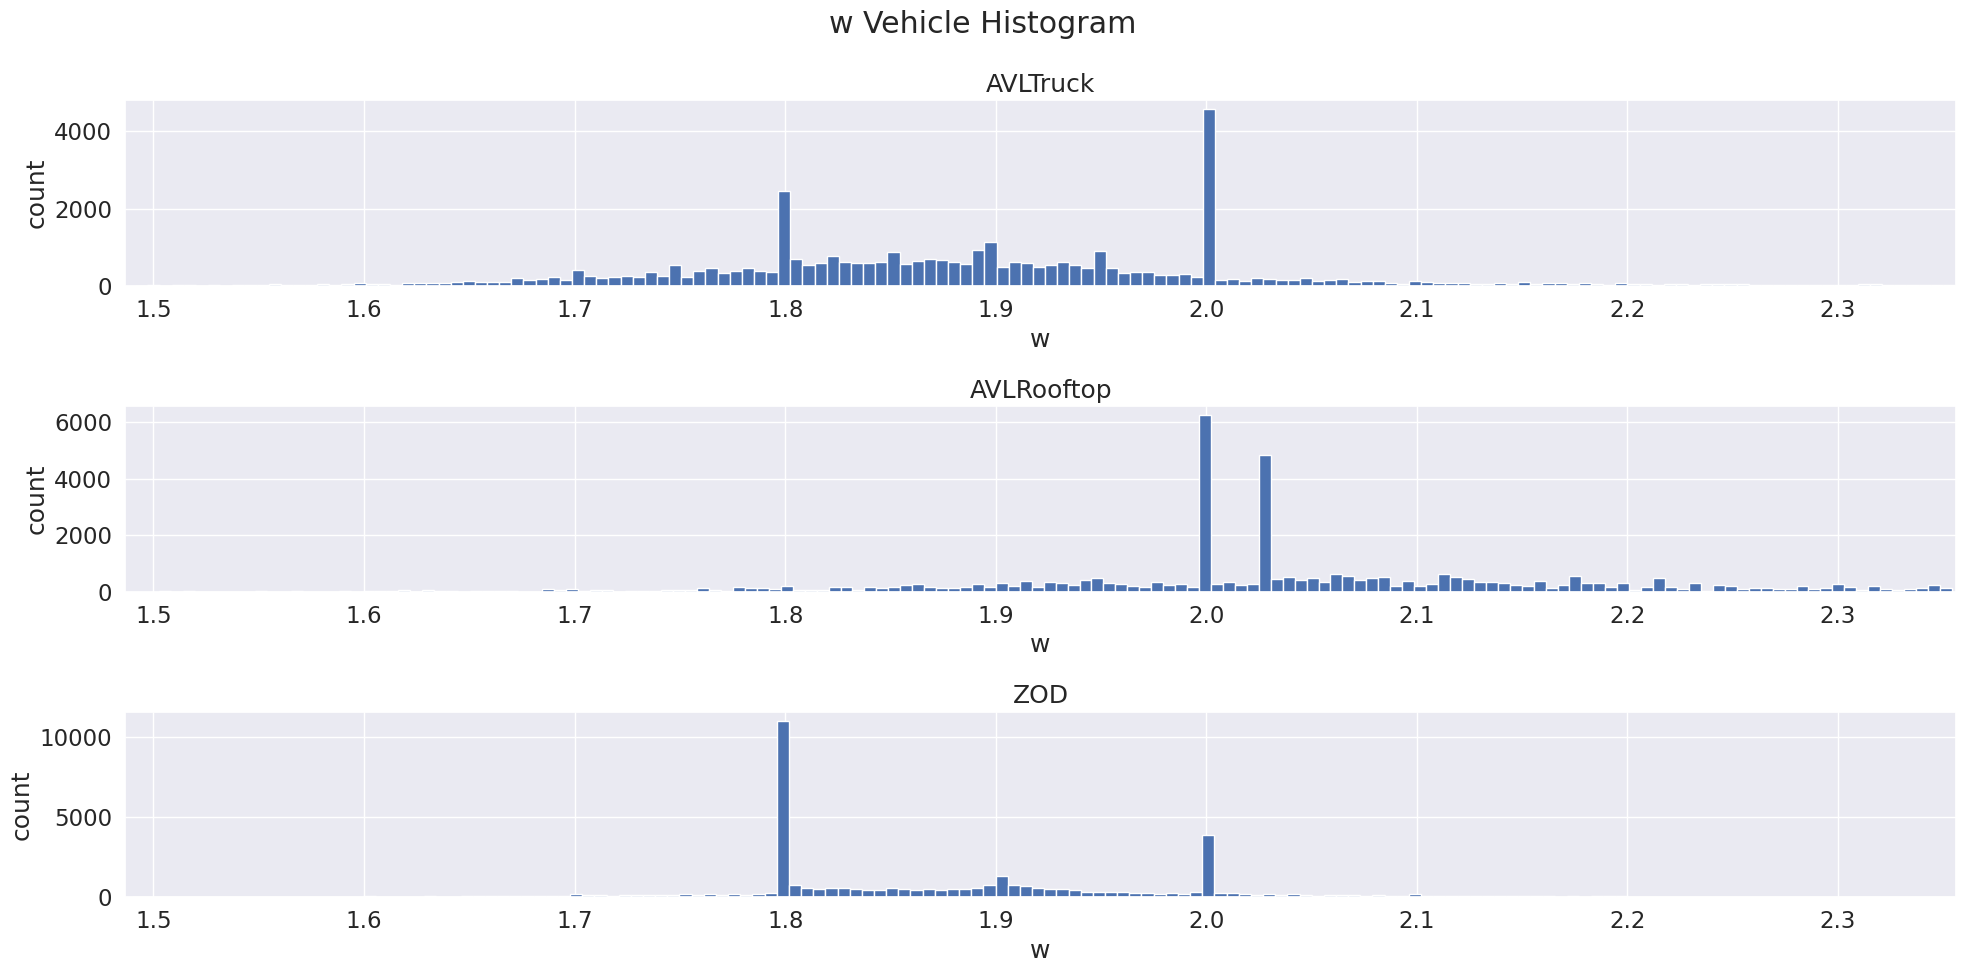

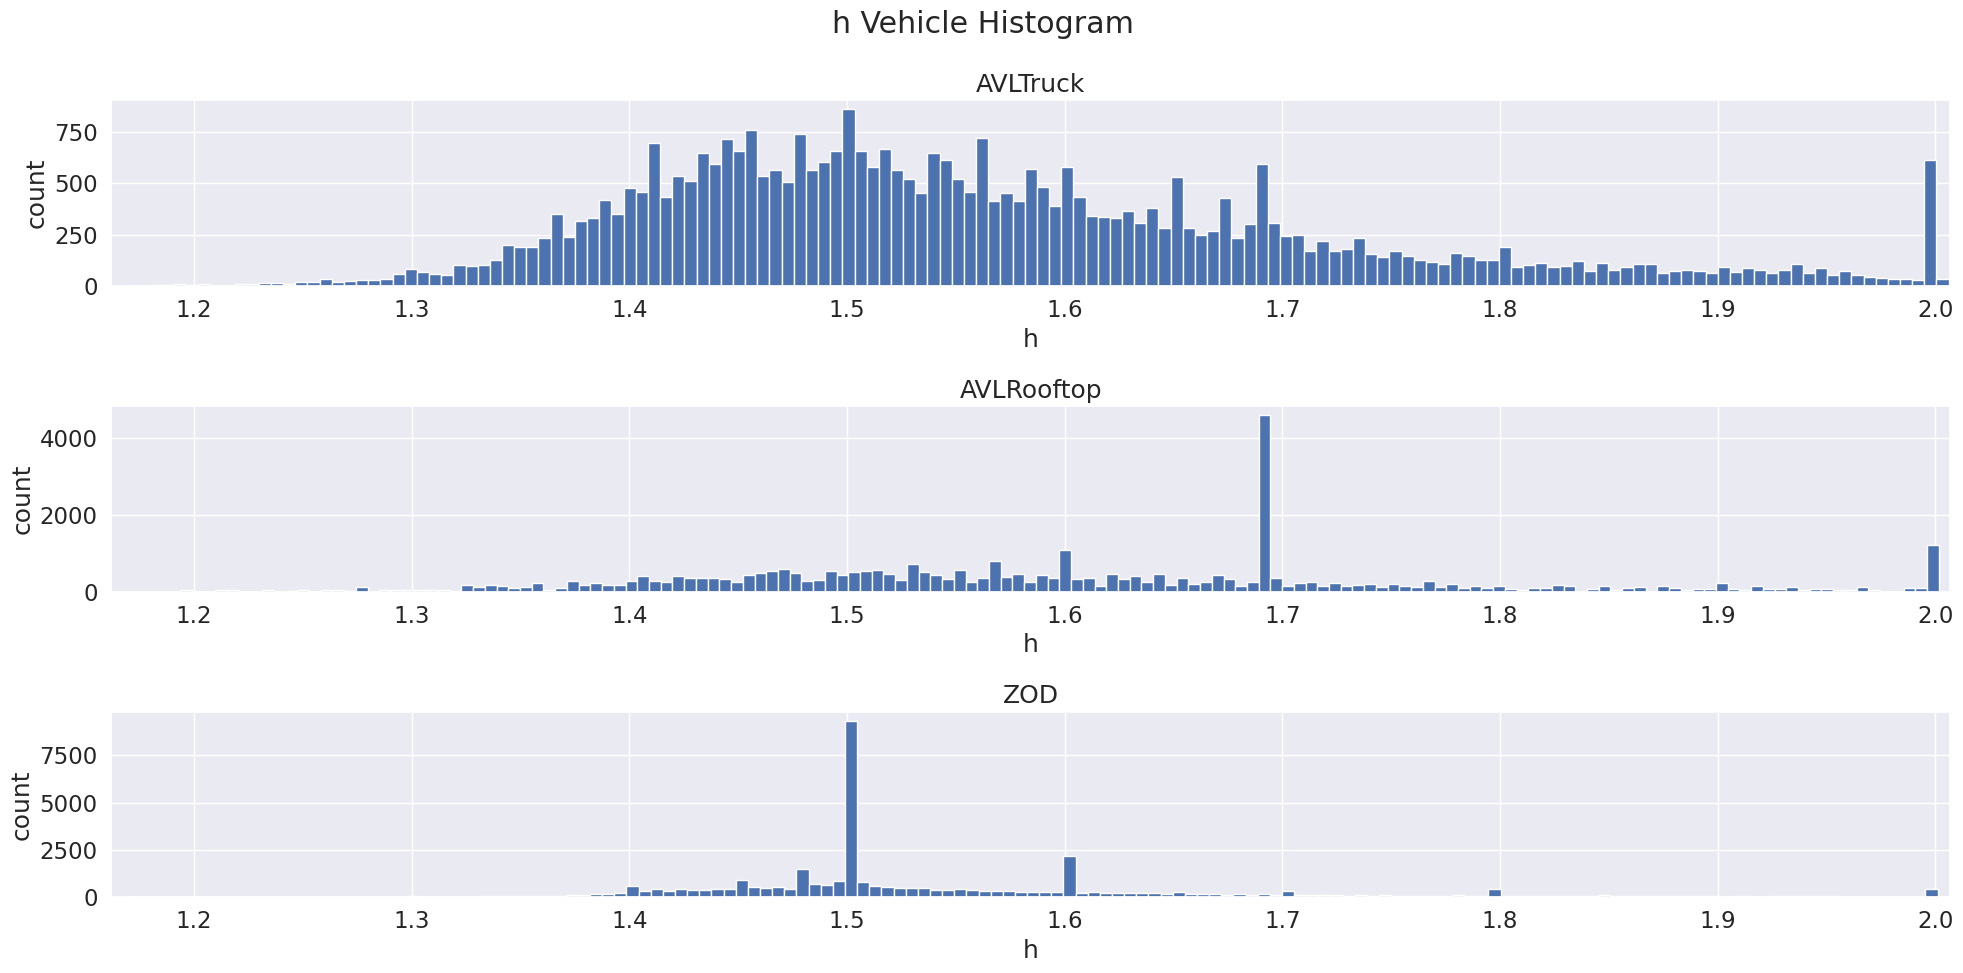

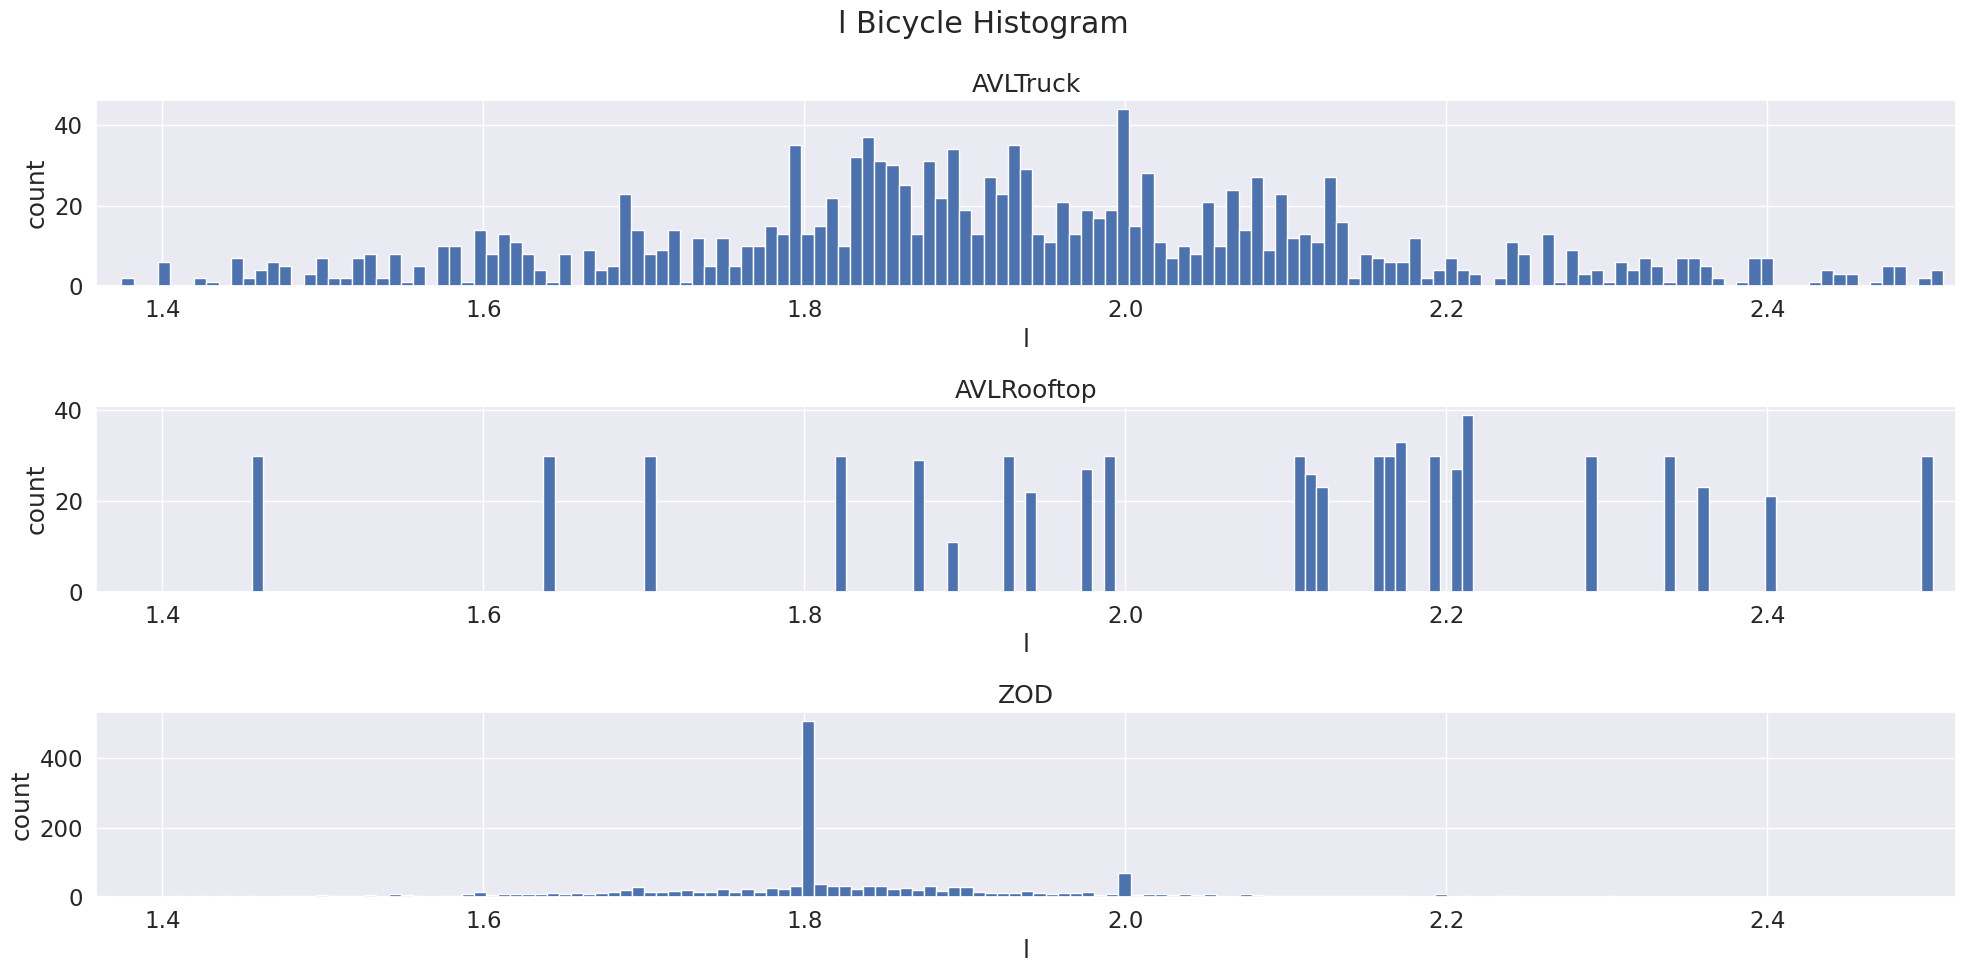

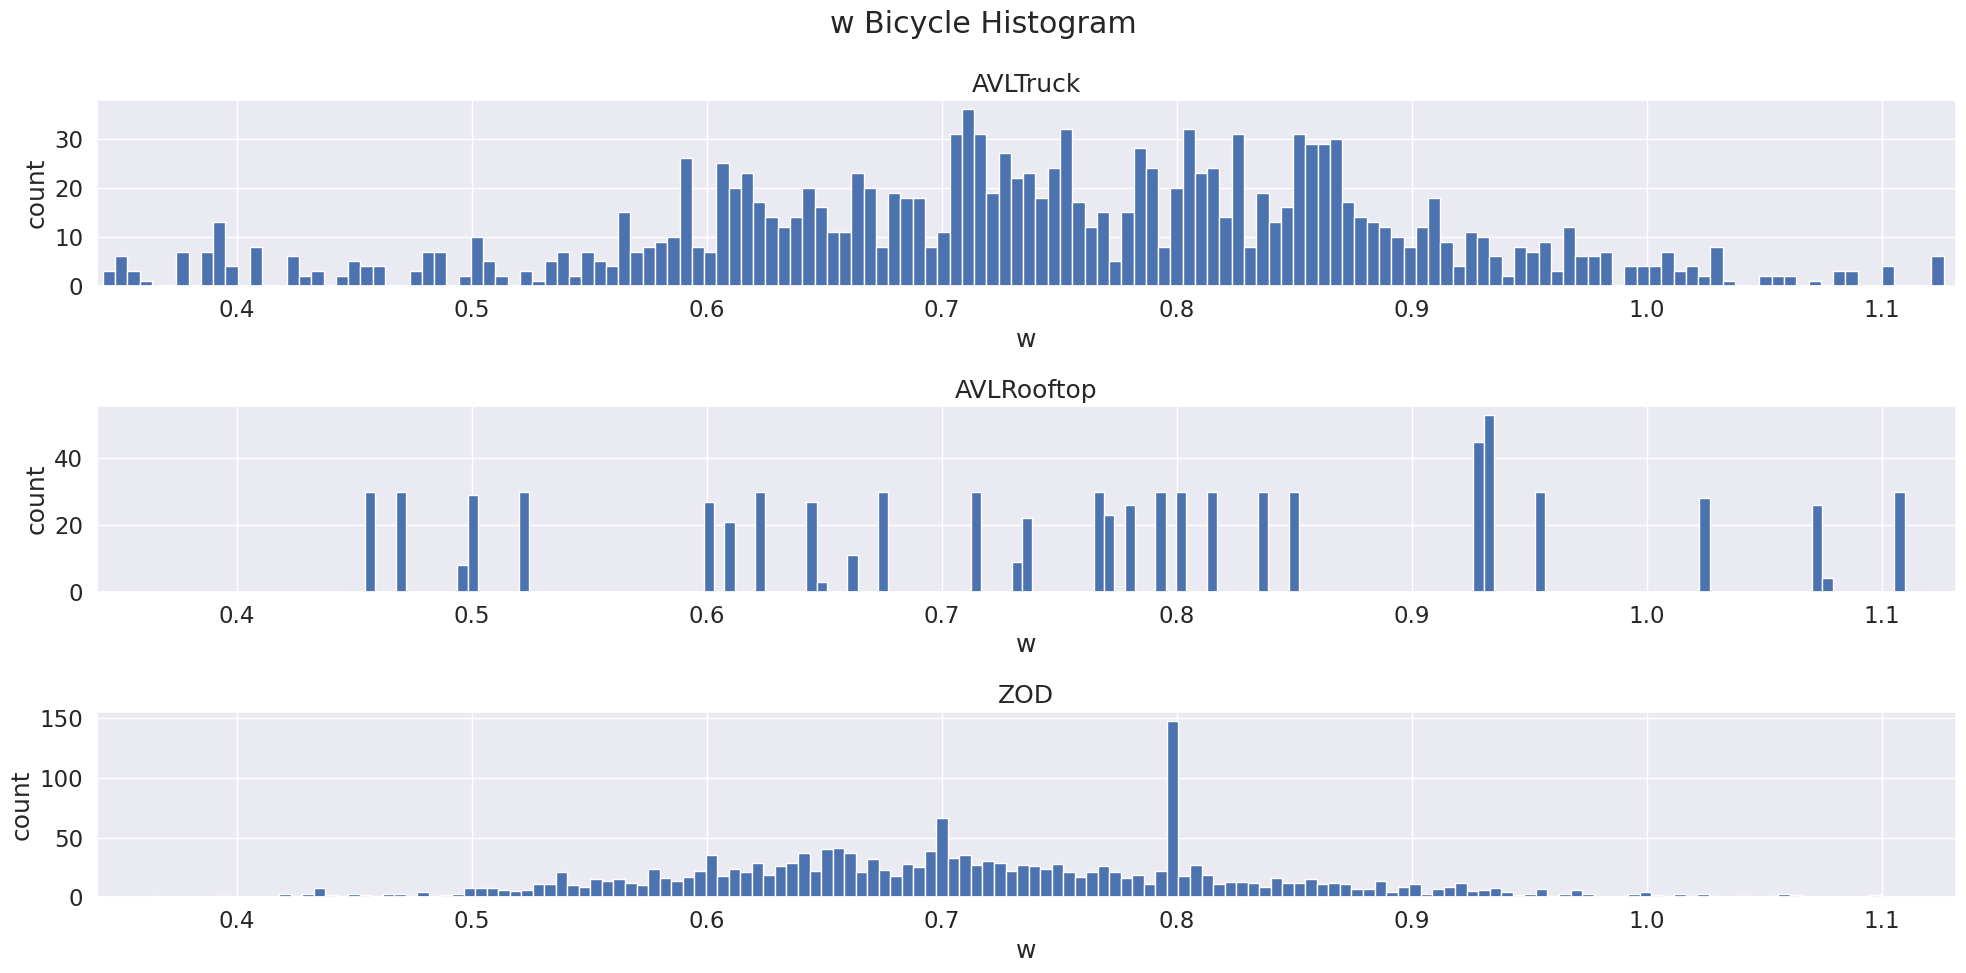

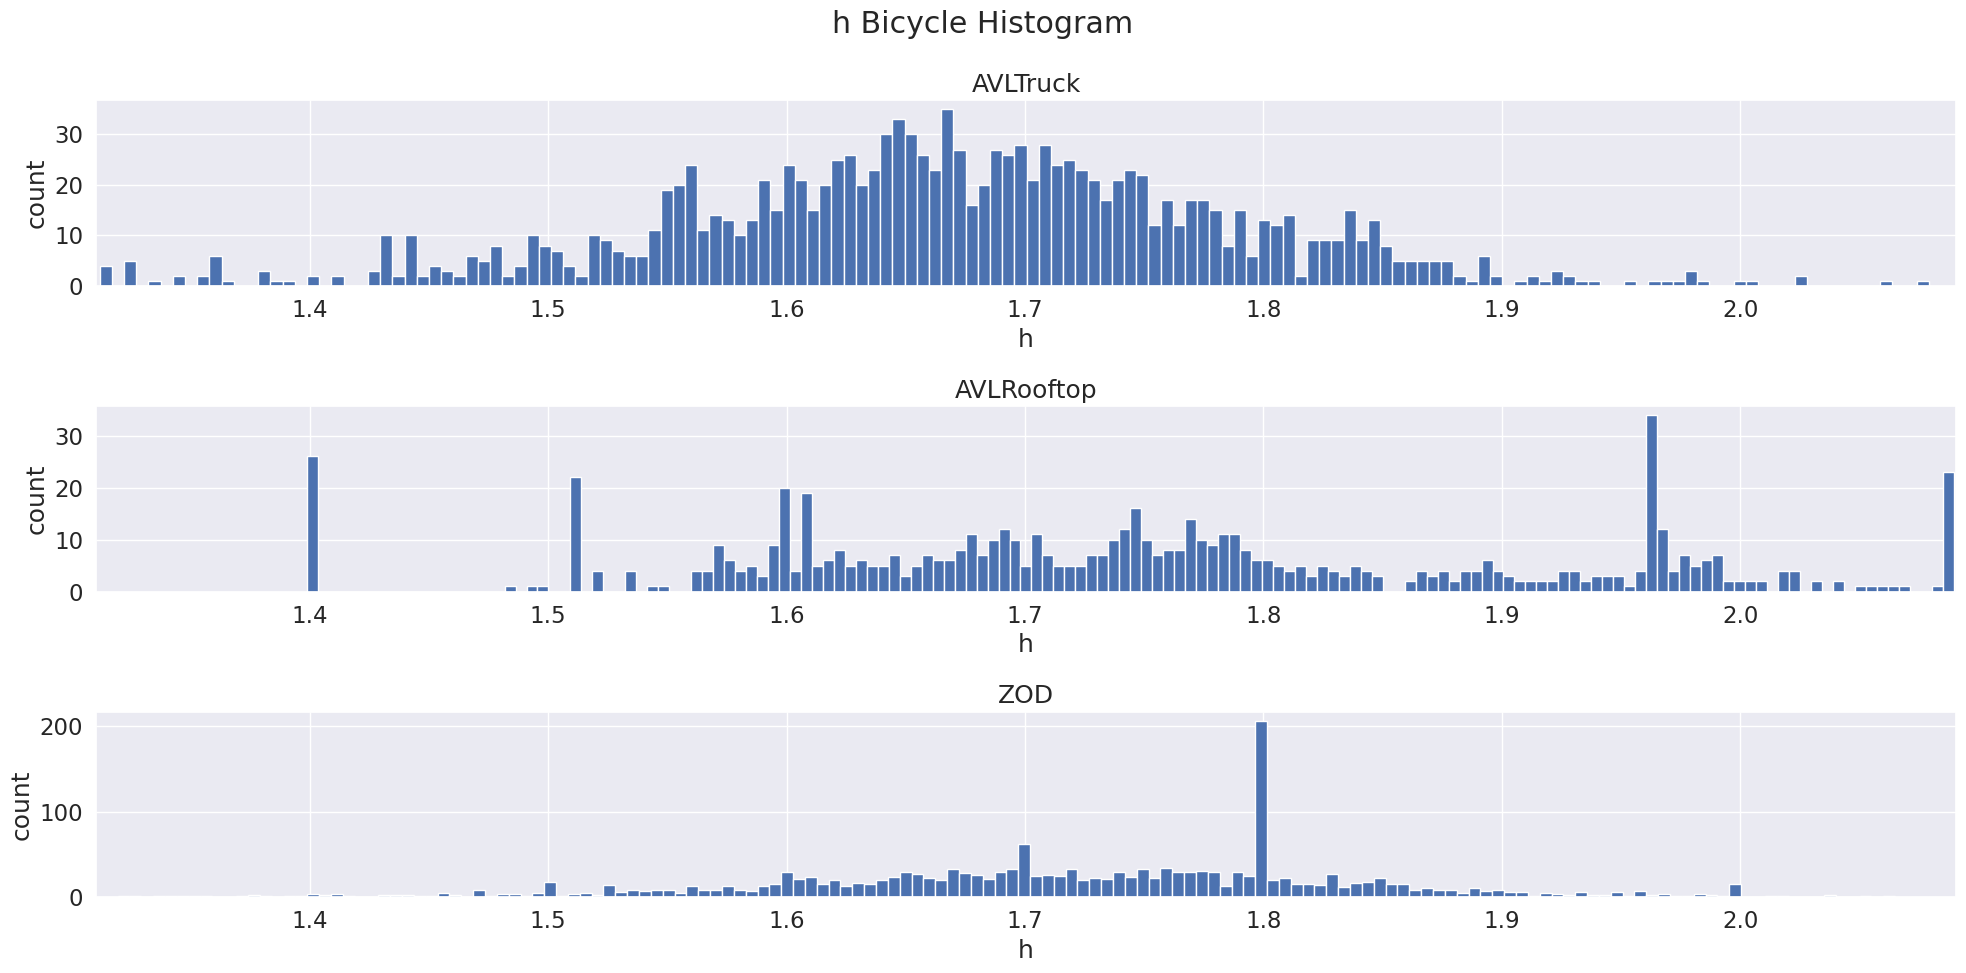

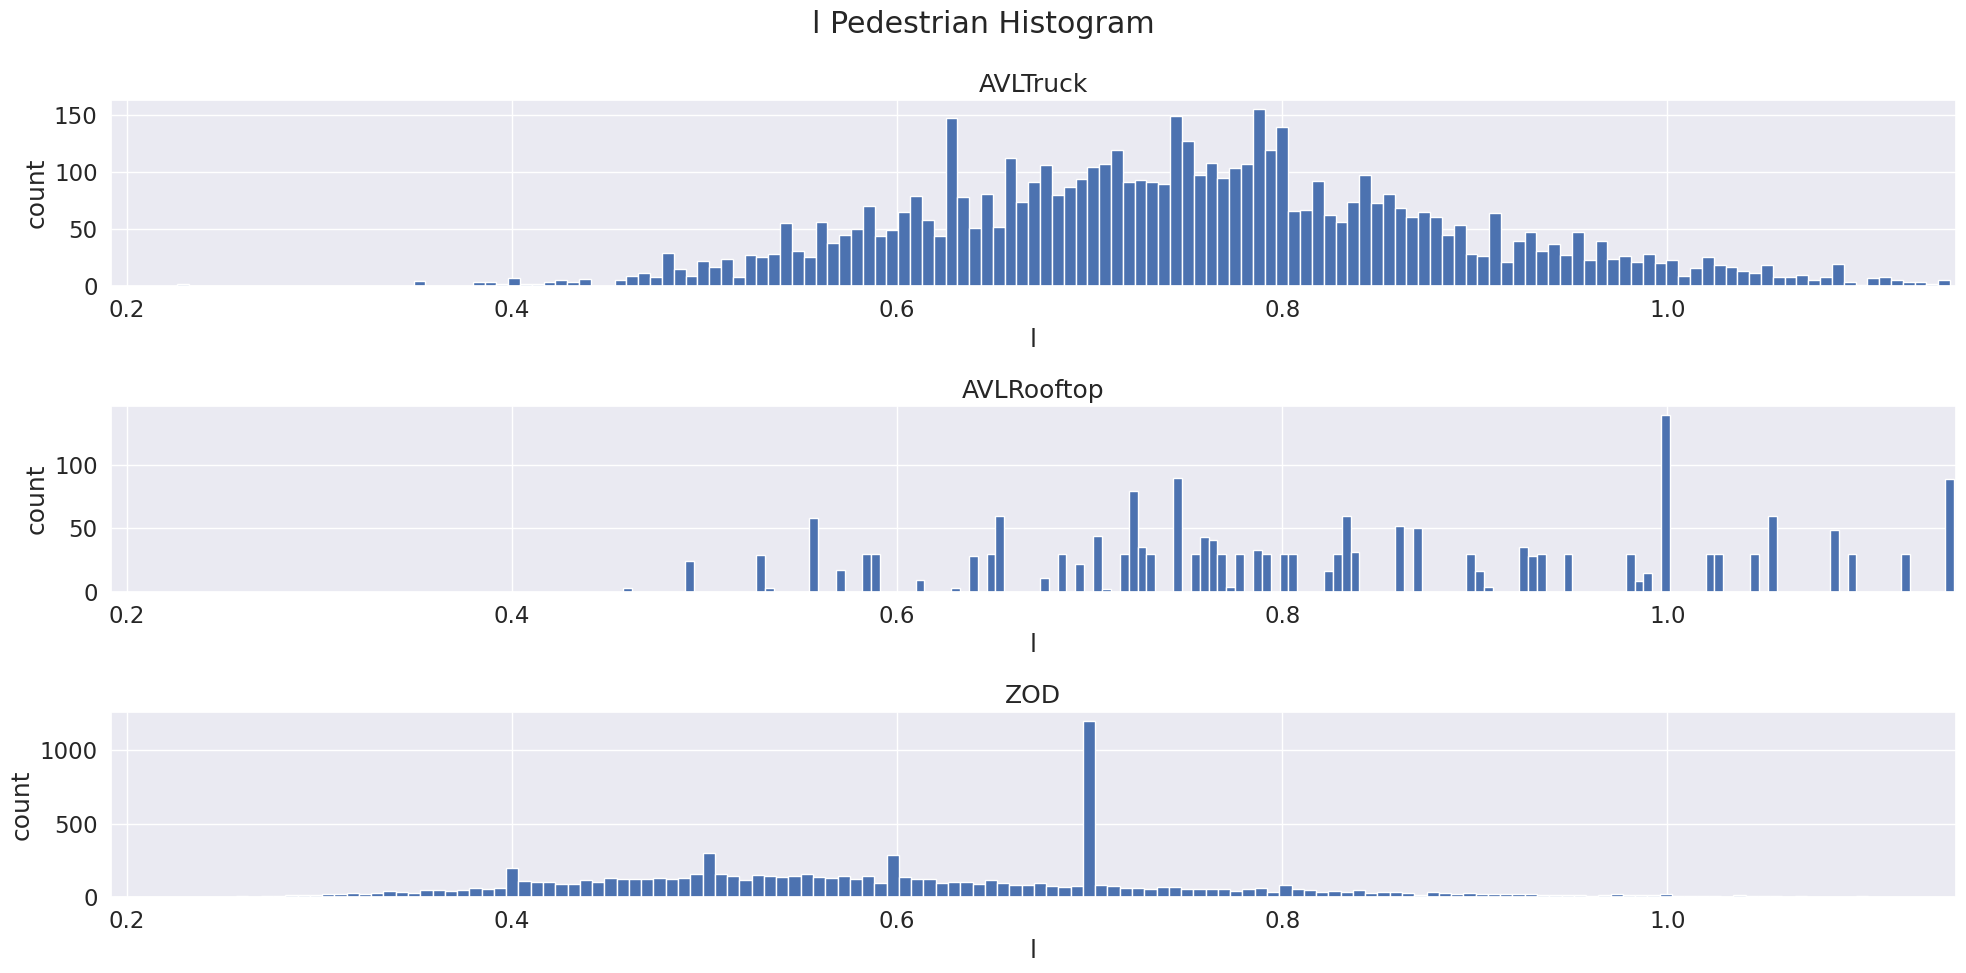

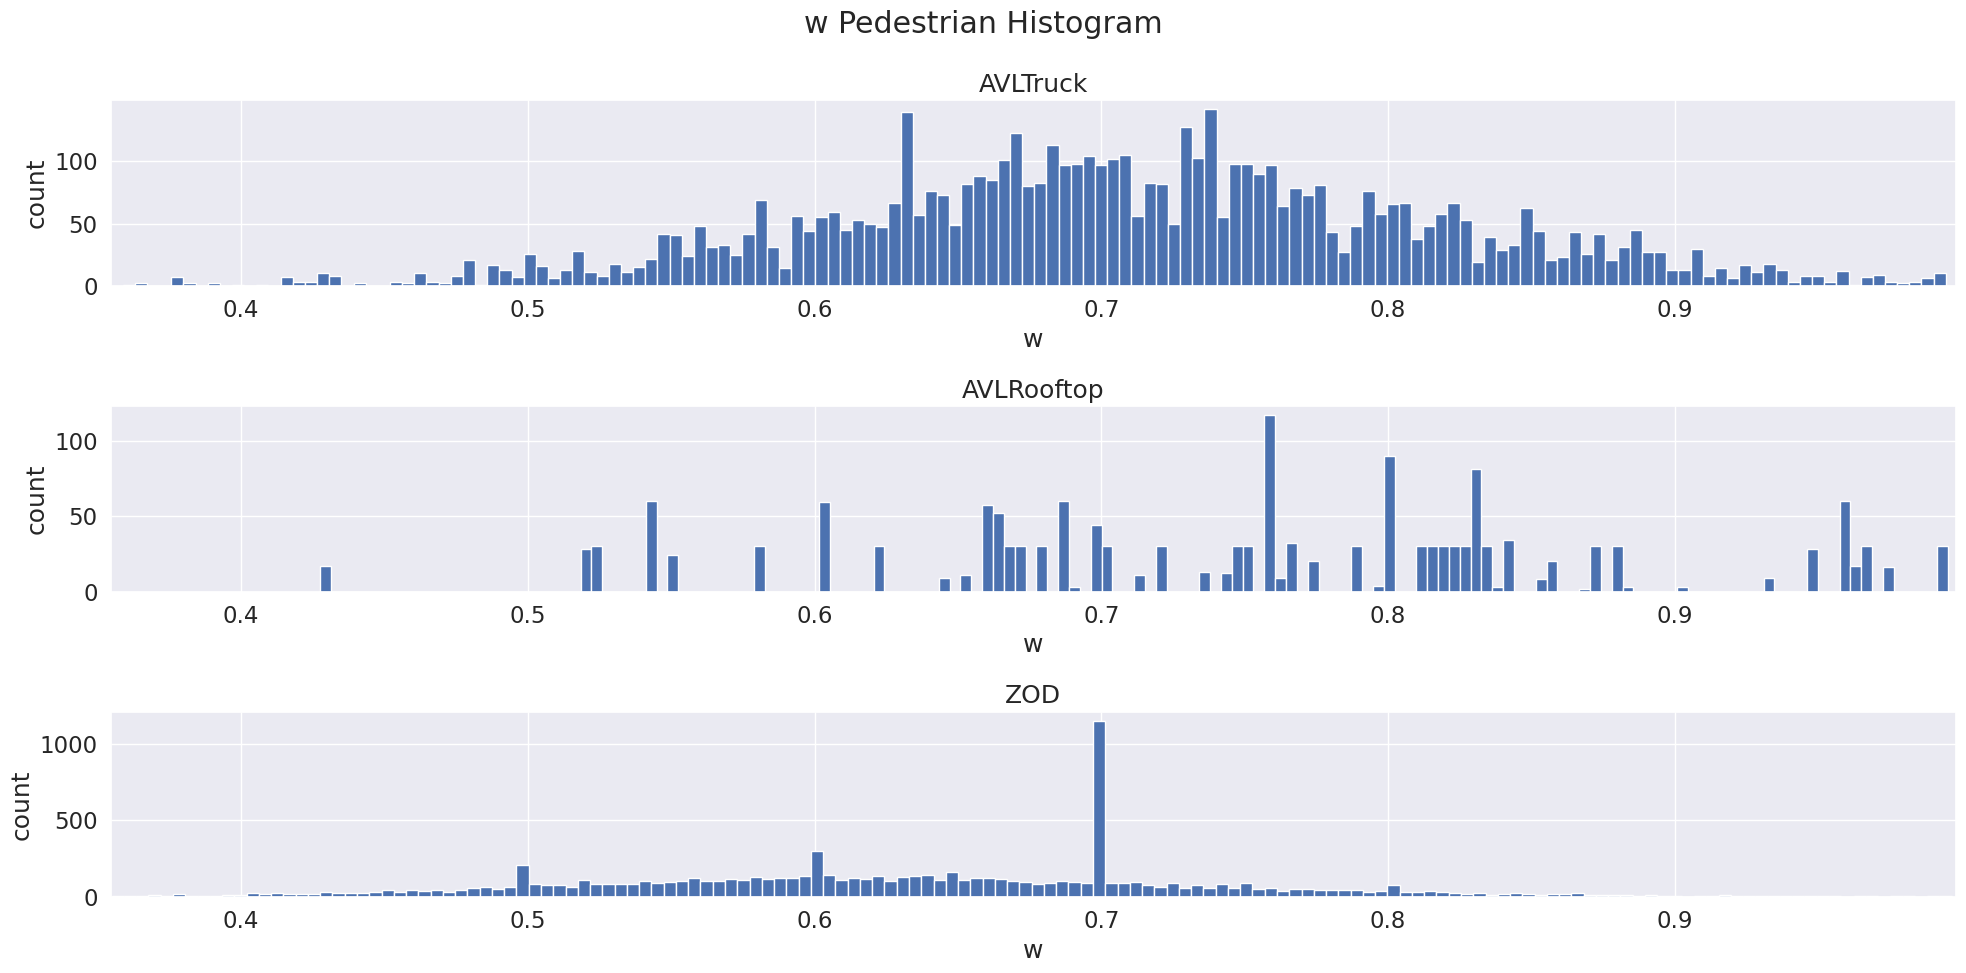

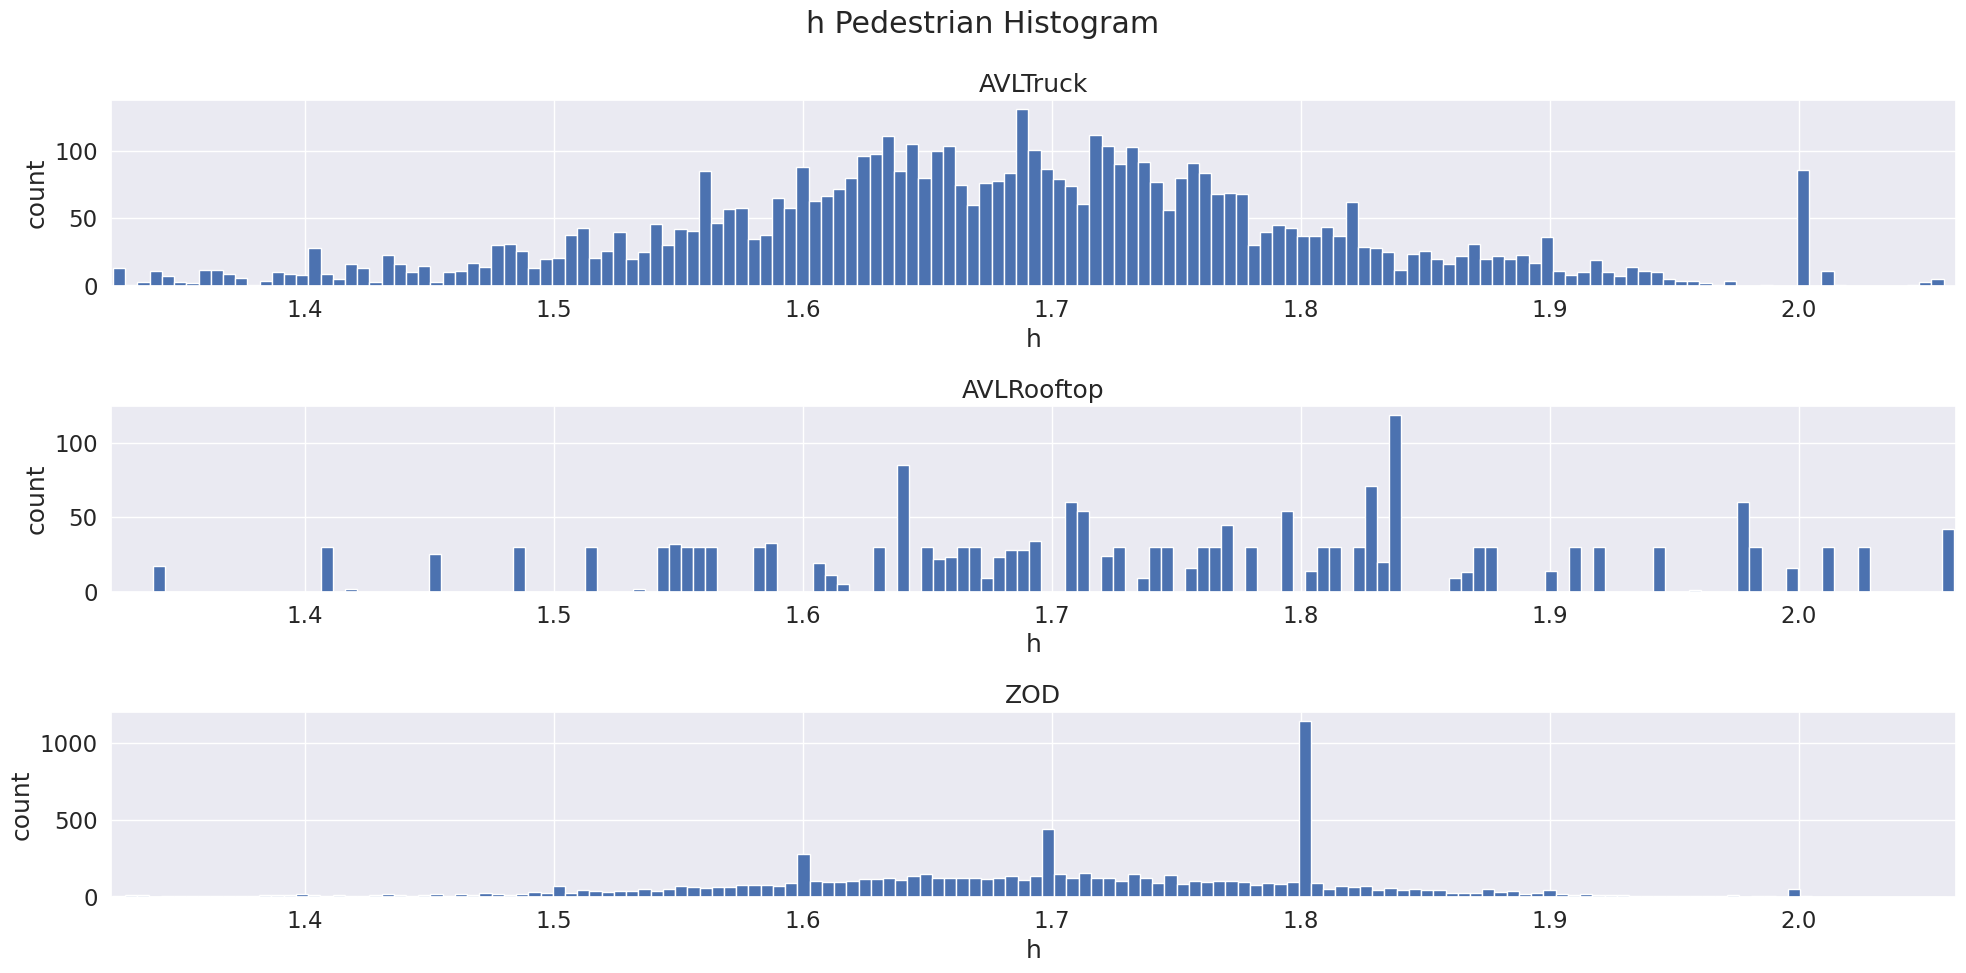

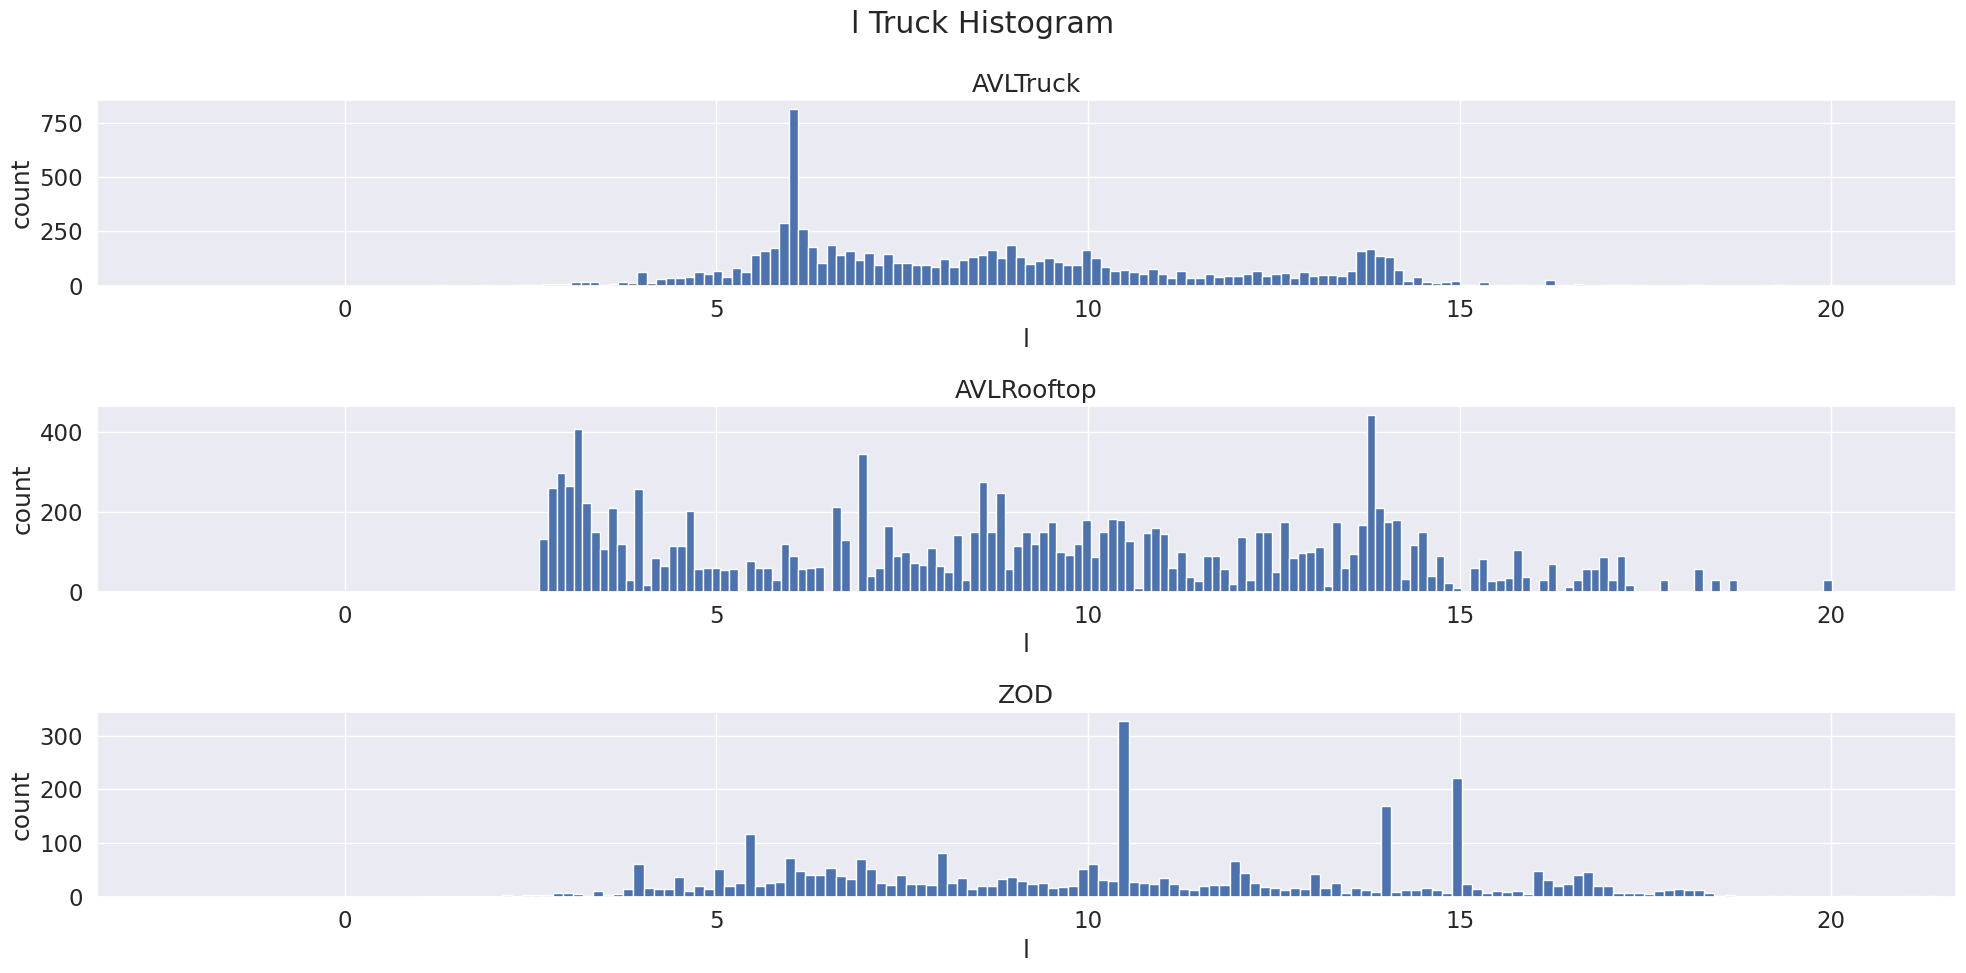

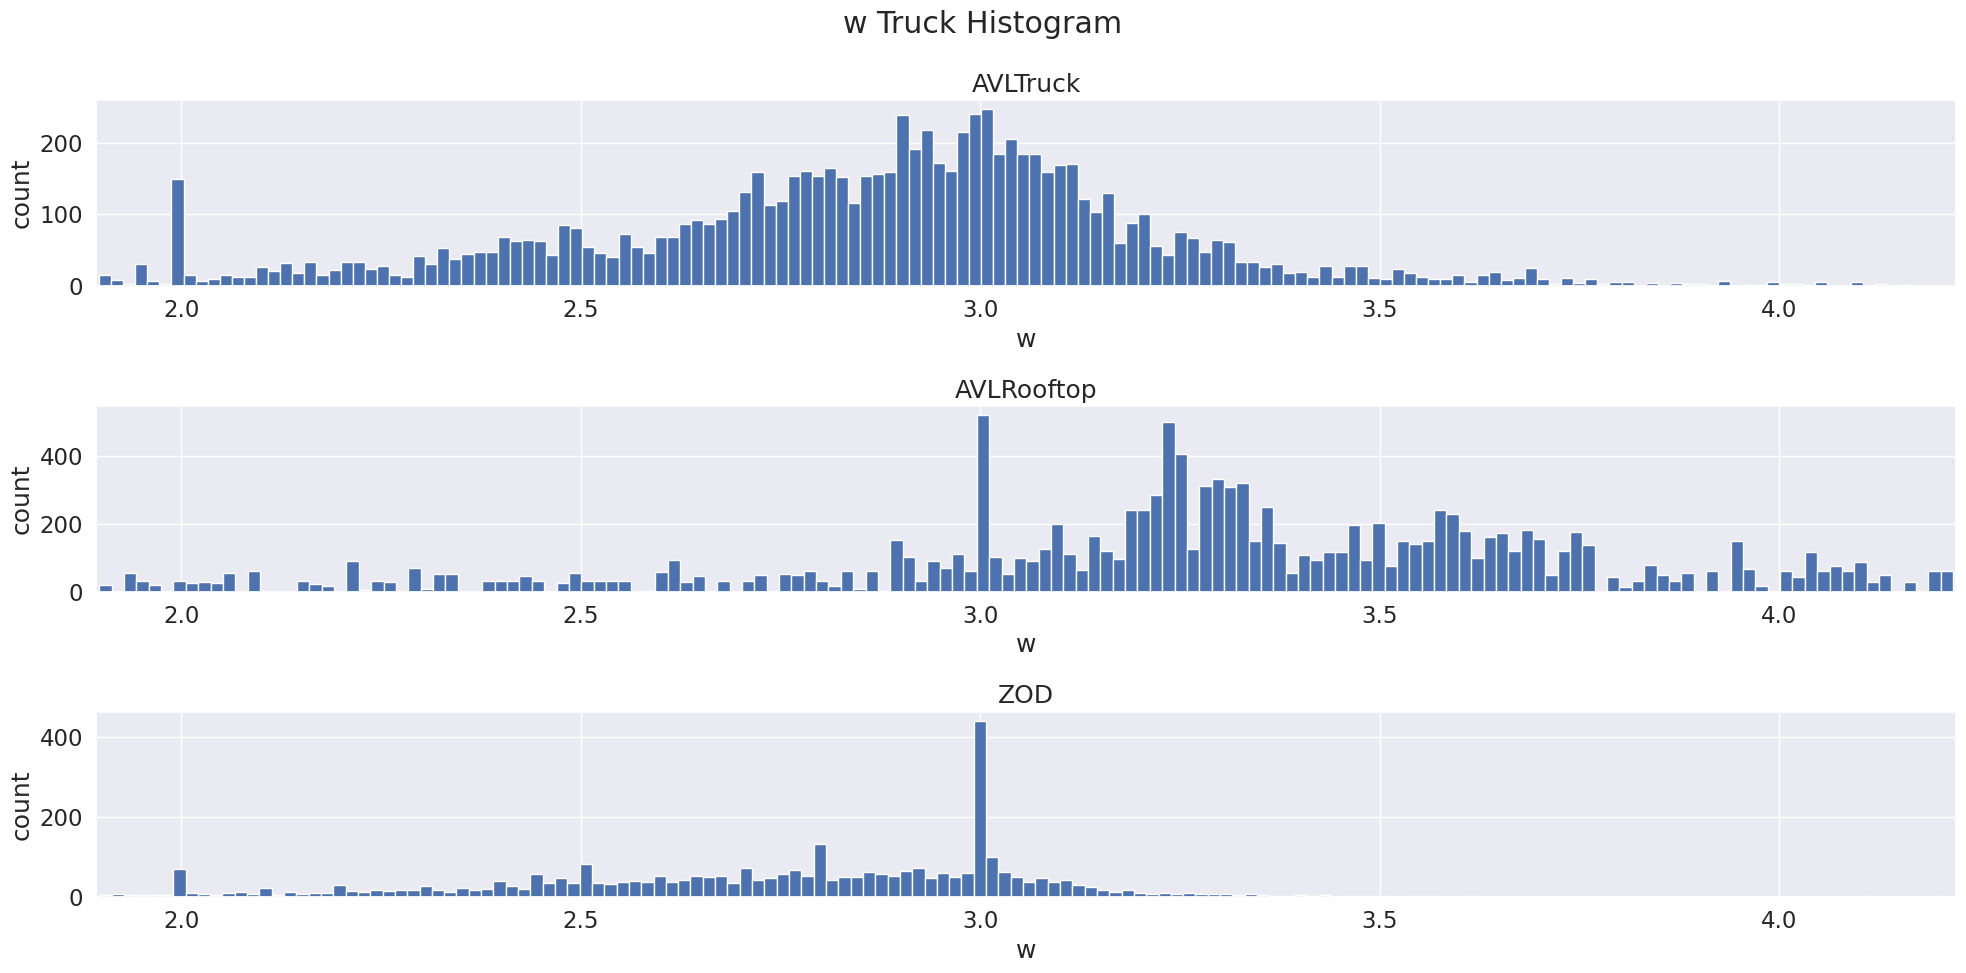

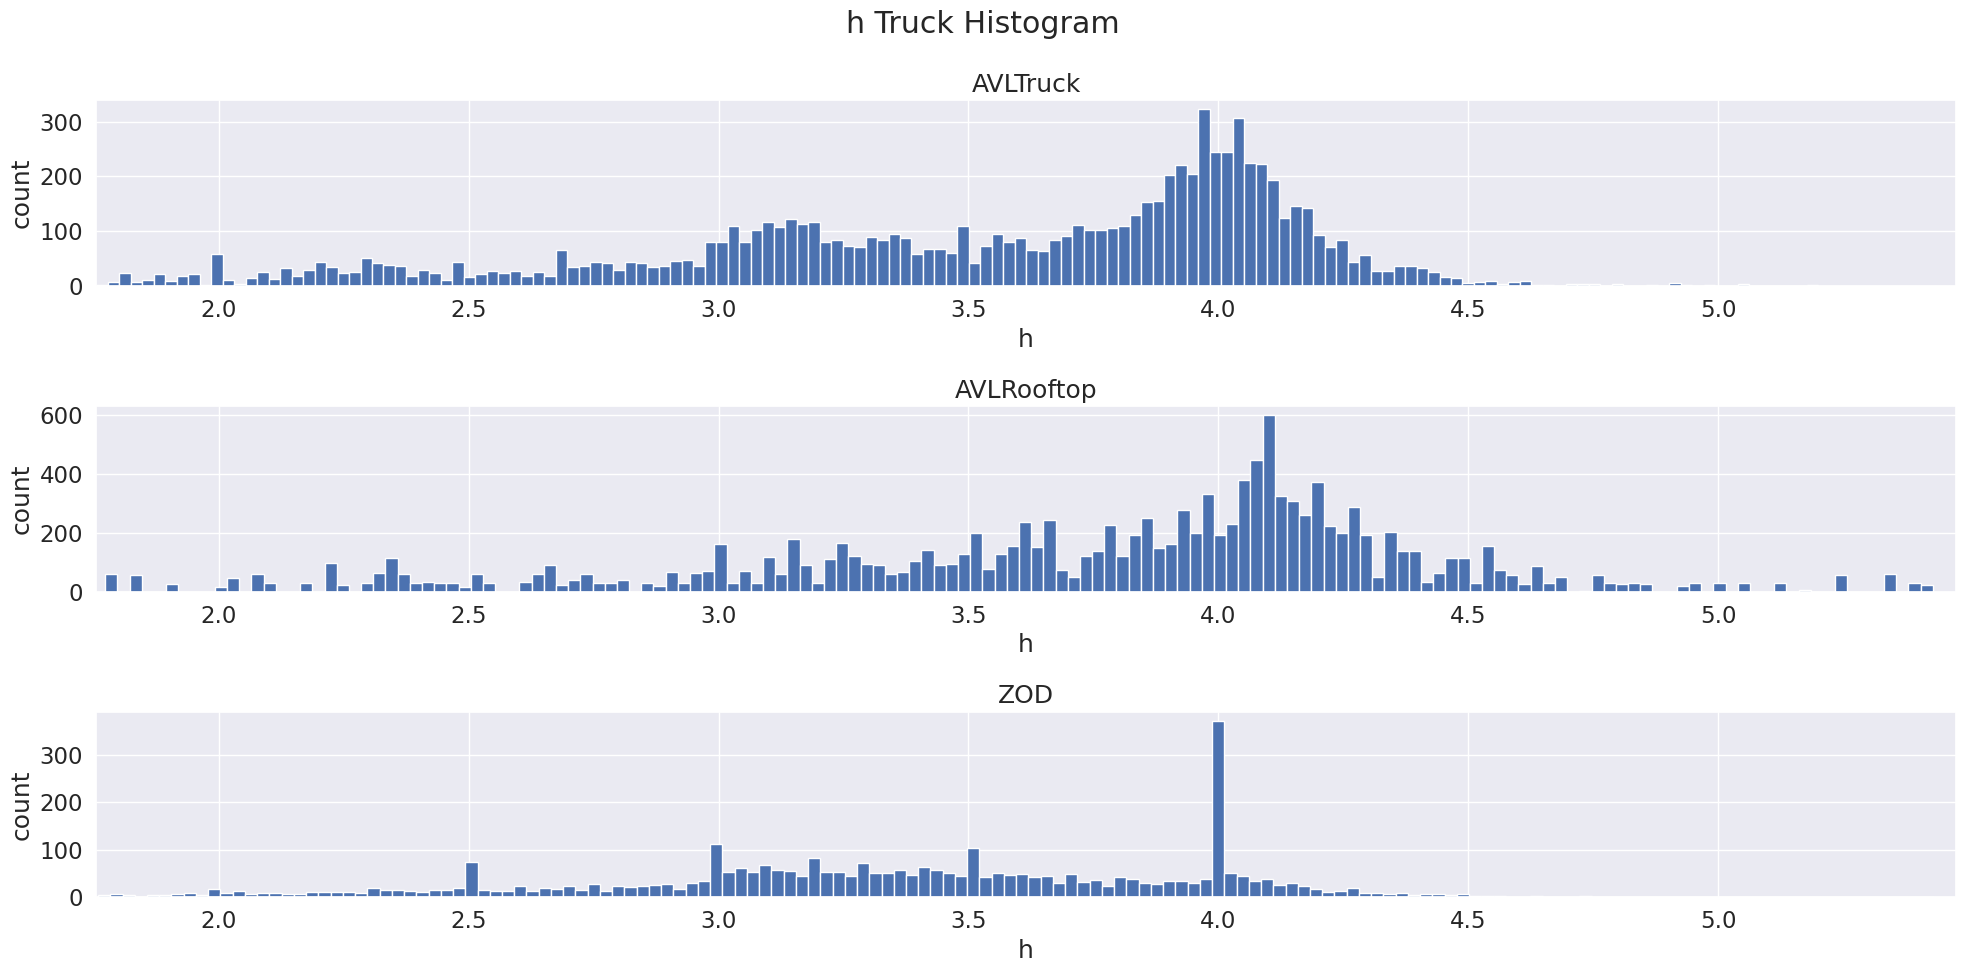

In [15]:
dataset_names = ['AVLTruck', 'AVLRooftop', 'ZOD']
class_names = ['Vehicle', 'Bicycle', 'Pedestrian', 'Truck']
metrics = ['l', 'w', 'h']

#filter for class vehicle
for class_name in class_names:
    df_class = df[df['class'] == class_name]

    for metric in metrics:
        sns.set_style("darkgrid")
        sns.set_context("paper")
        sns.set(font_scale=1.5)
        plt.figure(figsize=(20, 10))
        #use all datasets and 95% inliers for common scaling
        #calc limits
        q1 = df_class[metric].quantile(0.25)
        q3 = df_class[metric].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr

        for dataset_idx in range(len(dataset_names)):
            plt.subplot(3,1, dataset_idx+1)

            #redice data to limits
            df_filtered = df_class[(df_class[metric] < upper_limit) & (df_class[metric] > lower_limit)]

            plt.hist(df_filtered[df_filtered['dataset'] == dataset_names[dataset_idx]][metric], bins=150)
            plt.title(dataset_names[dataset_idx])
            plt.xlabel(metric)
            plt.ylabel('count')        

            #set limits
            plt.xlim(lower_limit, upper_limit)

        plt.suptitle(metric + " " + class_name + ' Histogram')
        plt.tight_layout()
        plt.show()

### Analyze Frames and Scenes

In [ ]:

# %% plot histogram with numnber of sequences in dataframe
sns.set_style("darkgrid")
sns.set_context("paper")
sns.set(font_scale=1.5)
plt.figure(figsize=(20, 10))
plt.hist(df['sequence'].value_counts(), bins=100)
plt.title('Number of sequences in dataframe')
plt.xlabel('number of sequences')
plt.ylabel('count')
plt.tight_layout()
plt.show()

#%% plot histogram with number of instances per frame
sns.set_style("darkgrid")
sns.set_context("paper")
sns.set(font_scale=1.5)
plt.figure(figsize=(20, 10))
plt.hist(df['frame_idx'].value_counts(), bins=100)
plt.title('Number of instances per frame')
plt.xlabel('number of instances')
plt.ylabel('count')
plt.tight_layout()
plt.show()

In [ ]:
#%% analyze the data
# print average number of points for each class
print("Average number of points for each class:")
print(df.groupby('class')['num_points_in_gt'].mean())

#prinnt mode of number of points for each class
print("Mode of number of points for each class:")
print(df.groupby('class')['num_points_in_gt'].agg(pd.Series.mode))

#%%  plot sns distplot with number of points per class for class Vehicle_Drivable_Car
sns.set_style("darkgrid")
sns.set_context("paper")
sns.set(font_scale=1.5)
plt.figure(figsize=(20, 10))
sns.distplot(df[df['class'] == 'Vehicle_Drivable_Car']['num_points_in_gt'], bins=100, )
plt.title('Vehicle_Drivable_Car')
plt.xlabel('num_points_in_gt')
plt.ylabel('count')
plt.tight_layout()
plt.show()


#%% plot histogram of number of points for each class, make a seperate plot for each class and plot all on one figure, label each plot with the class name
sns.set_style("darkgrid")
sns.set_context("paper")
sns.set(font_scale=1.5)
plt.figure(figsize=(20, 10))
for i in range(len(classes)):
    plt.subplot(3,4,i+1)
    
    # calc limit with 99% inliers
    upper_limit = np.percentile(df[df['class'] == classes[i]]['num_points_in_gt'], 95)
    
    #only use boxes with more than 5 points
    lower_limit = 5
    plt.hist(df[df['class'] == classes[i]]['num_points_in_gt'], bins=100, range=(lower_limit, upper_limit))
    plt.title(classes[i])
    plt.xlabel('num_points_in_gt')
    plt.ylabel('count')
plt.suptitle('Number of points in ground truth histogram')
plt.tight_layout()
plt.show()


# %% plot bar chart for number of instances per class, tile the x labels so they are readable
sns.set_style("darkgrid")
sns.set_context("paper")
sns.set(font_scale=1.5)
plt.figure(figsize=(20, 10))
agg_df = df.groupby('class')['num_points_in_gt'].count()
classes_plot = agg_df.index
plt.bar(classes_plot, df.groupby('class')['num_points_in_gt'].count())
plt.xticks(rotation=45, ha='right')
plt.xlabel('class')
plt.ylabel('count')
#print the number on top of each bar
for i in range(len(classes_plot)):
    plt.text(i, agg_df[i], agg_df[i], ha='center', va='bottom')
plt.suptitle('Number of instances per class')
plt.tight_layout()
plt.show()


# %% plot histogram with distance (can be calculated with x and y) for each class, make a seperate plot for each class and plot all on one figure, label each plot with the class name
sns.set_style("darkgrid")
sns.set_context("paper")
sns.set(font_scale=1.5)
plt.figure(figsize=(20, 10))
for i in range(len(classes)):
    plt.subplot(3,4,i+1)
    plt.hist(np.sqrt(df[df['class'] == classes[i]]['x']**2 + df[df['class'] == classes[i]]['y']**2), bins=100)
    plt.title(classes[i])
    plt.xlabel('distance')
    plt.ylabel('count')
plt.suptitle('Distance Histogram')
plt.tight_layout()
#name plot
plt.show()







### Analyze frame limits

In [ ]:

# %% given limits for x, y and z, calculate the percentage of rowss per class (from df) that are outside the limits for each class
#limits
x_min = -75
x_max = 125
y_min = -75
y_max = 75
z_min = -2
z_max = 4

#calculate percentage of classes that are outside the limits for each class
print("Percentage of classes that are outside the limits for each class:")
for i in range(len(classes)):
    print(classes[i],"\t\t\t" ,df[(df['class'] == classes[i]) & ((df['x'] < x_min) | (df['x'] > x_max) | (df['y'] < y_min) | (df['y'] > y_max) | (df['z'] < z_min) | (df['z'] > z_max))].shape[0] / df[df['class'] == classes[i]].shape[0])

# %% print the total number of instances that are inside the limits for every frame

#calculate a df containing only the instances that are inside the limit
df_limit = df[(df['x'] > x_min) & (df['x'] < x_max) & (df['y'] > y_min) & (df['y'] < y_max) & (df['z'] > z_min) & (df['z'] < z_max)]

#calculate the number of instances per frame
print("Number of instances per frame:")
print(df_limit['frame_idx'].value_counts())


### Plot object size matrix

/tmp/ipykernel_3065013/2631076597.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_dims = df.groupby('dataset')['l', 'w', 'h'].mean()


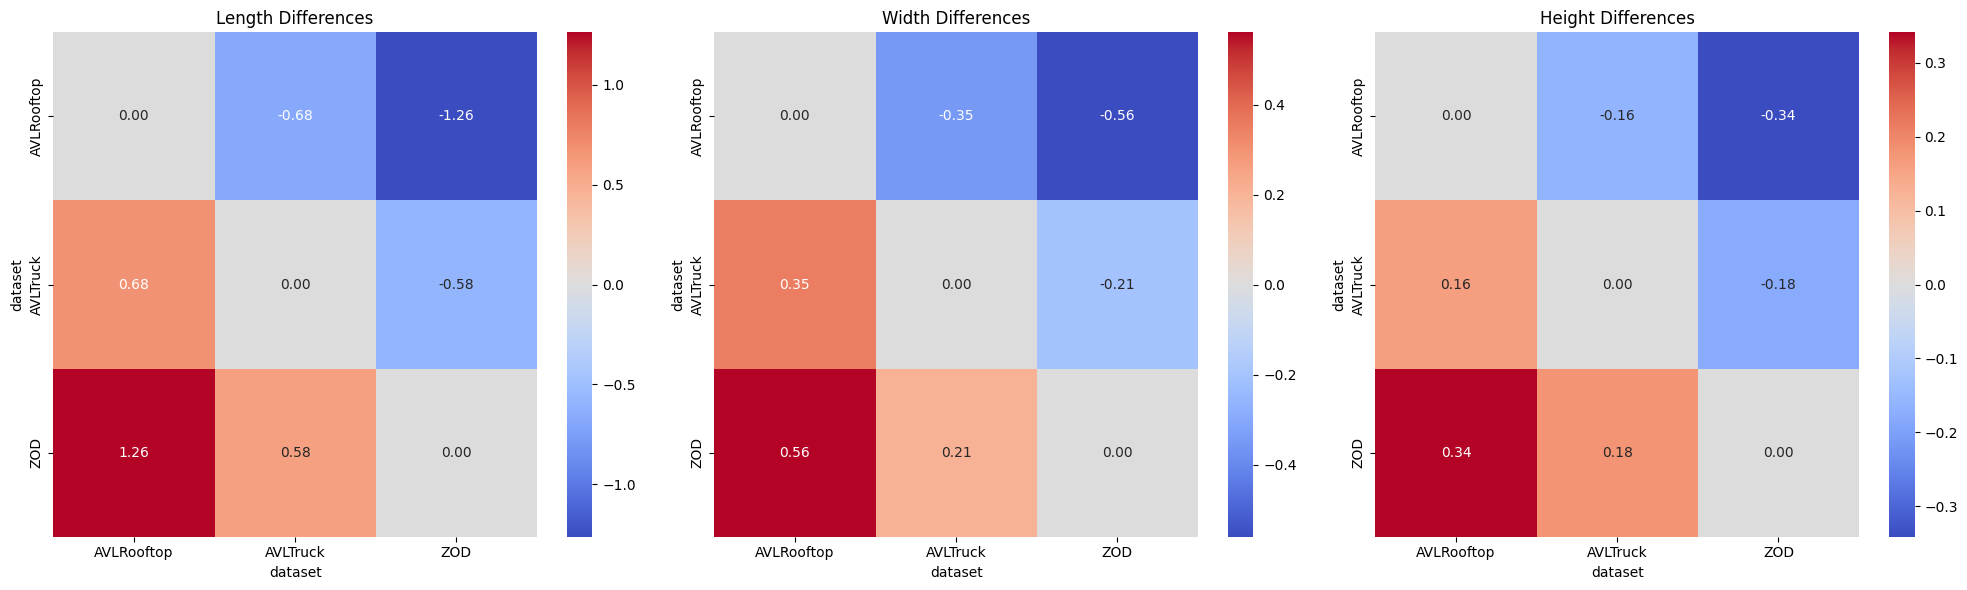

In [30]:
# Calculate the mean values of l, w, h for each dataset
mean_dims = df.groupby('dataset')['l', 'w', 'h'].mean()

# Create empty dictionaries to store the difference matrices
l_diff_matrix = pd.DataFrame(index=mean_dims.index, columns=mean_dims.index)
w_diff_matrix = pd.DataFrame(index=mean_dims.index, columns=mean_dims.index)
h_diff_matrix = pd.DataFrame(index=mean_dims.index, columns=mean_dims.index)

# Calculate the differences for l, w, h and store them in the respective matrices
for dataset_i in mean_dims.index:
    for dataset_j in mean_dims.index:
        l_diff_matrix.at[dataset_i, dataset_j] = mean_dims.loc[dataset_j, 'l'] - mean_dims.loc[dataset_i, 'l']
        w_diff_matrix.at[dataset_i, dataset_j] = mean_dims.loc[dataset_j, 'w'] - mean_dims.loc[dataset_i, 'w']
        h_diff_matrix.at[dataset_i, dataset_j] = mean_dims.loc[dataset_j, 'h'] - mean_dims.loc[dataset_i, 'h']

# Fill diagonal with zeros for better visualization since the difference with oneself is zero
import numpy as np

for matrix in [l_diff_matrix, w_diff_matrix, h_diff_matrix]:
    np.fill_diagonal(matrix.values, 0)

# Plot the difference matrices
diff_matrices = {'Length Differences': l_diff_matrix, 'Width Differences': w_diff_matrix, 'Height Differences': h_diff_matrix}

# Create a figure with three subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Titles for the heatmaps
titles = ['Length Differences', 'Width Differences', 'Height Differences']

# Plot each difference matrix in a subplot
for ax, (title, matrix) in zip(axes, diff_matrices.items()):
    sns.heatmap(matrix.astype(float), annot=True, fmt=".2f", cmap="coolwarm", ax=ax)
    ax.set_title(title)

# Display the figure with the heatmaps side by side
plt.tight_layout()  # Adjust layout to fit everything without overlapping
plt.show()




In [31]:
import pandas as pd

# Group by both 'dataset' and 'class', then calculate mean dimensions
mean_dims = df.groupby(['dataset', 'class']).mean()[['l', 'w', 'h']]

# Get unique datasets and classes
datasets = df['dataset'].unique()
classes = df['class'].unique()
dimensions = ['l', 'w', 'h']

# Create an empty DataFrame with multi-indexing for both rows and columns
multi_index = pd.MultiIndex.from_product([datasets, classes], names=['Dataset', 'Class'])
columns = pd.MultiIndex.from_product([datasets, dimensions], names=['Dataset', 'Dimension'])

# Initialize the DataFrame with NaN values
diff_matrix = pd.DataFrame(index=multi_index, columns=columns).sort_index()

# Calculate the differences
for dataset_i in datasets:
    for dataset_j in datasets:
        for cls in classes:
            # Skip self-comparison
            if dataset_i == dataset_j:
                continue
            
            # Calculate differences
            differences = mean_dims.loc[(dataset_j, cls)] - mean_dims.loc[(dataset_i, cls)]
            
            # Assign differences to the matrix
            for dim in dimensions:
                diff_matrix.loc[(dataset_i, cls), (dataset_j, dim)] = differences[dim]

# Round the matrix to 3 decimal places
diff_matrix = diff_matrix.round(3)

# Replace NaN with 0, assuming NaN means no difference because there was no data for that class in one of the datasets
diff_matrix.fillna(0, inplace=True)

import io

# Ensure the DataFrame is rounded to 3 decimal places
diff_matrix_rounded = diff_matrix.round(3)

# Create a buffer
output = io.StringIO()

# Write the rounded DataFrame to buffer with tab as the separator
diff_matrix_rounded.to_csv(output, sep='\t', index=True)

# Get the string from the buffer
output_string = output.getvalue()

# Print the string, or write it to a file
print("This can be copy-pasted into google sheets")
print("left(source) + difference = top(taget)")
print(output_string)


This can be copy-pasted into google sheets
Dataset		AVLTruck	AVLTruck	AVLTruck	AVLRooftop	AVLRooftop	AVLRooftop	ZOD	ZOD	ZOD
Dimension		l	w	h	l	w	h	l	w	h
Dataset	Class									
AVLRooftop	Bicycle	-0.231	-0.055	-0.165	0.0	0.0	0.0	-0.374	-0.093	-0.046
AVLRooftop	Pedestrian	-0.14	-0.144	-0.093	0.0	0.0	0.0	-0.283	-0.219	-0.065
AVLRooftop	Truck	-0.502	-0.456	-0.203	0.0	0.0	0.0	1.6	-0.568	-0.339
AVLRooftop	Vehicle	-0.225	-0.183	-0.068	0.0	0.0	0.0	-0.256	-0.191	-0.086
AVLTruck	Bicycle	0.0	0.0	0.0	0.231	0.055	0.165	-0.144	-0.038	0.119
AVLTruck	Pedestrian	0.0	0.0	0.0	0.14	0.144	0.093	-0.143	-0.075	0.029
AVLTruck	Truck	0.0	0.0	0.0	0.502	0.456	0.203	2.102	-0.112	-0.135
AVLTruck	Vehicle	0.0	0.0	0.0	0.225	0.183	0.068	-0.031	-0.007	-0.018
ZOD	Bicycle	0.144	0.038	-0.119	0.374	0.093	0.046	0.0	0.0	0.0
ZOD	Pedestrian	0.143	0.075	-0.029	0.283	0.219	0.065	0.0	0.0	0.0
ZOD	Truck	-2.102	0.112	0.135	-1.6	0.568	0.339	0.0	0.0	0.0
ZOD	Vehicle	0.031	0.007	0.018	0.256	0.191	0.086	0.0	0.0	0.0



/tmp/ipykernel_3065013/278736805.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_dims = df.groupby(['dataset', 'class']).mean()[['l', 'w', 'h']]
